---
# **Análisis de la desigualdad en Argentina: Brechas salariales por género, nivel educativo y región**

### Actividad integradora - Diplomatura en ciencia de datos orientada a los negocios
---

**Grupo 10 - Integrantes:**
- Franco Luis Blardone
- Ernesto Fabián Giuliano
- Pedro Emilio Robledo
- Pedro Pablo Sabaini
- Natalia Elizabeth Torres

---

La EPH es un programa nacional de producción permanente de indicadores sociales
cuyo objetivo es conocer las características socioeconómicas de la población. Es realizada en forma conjunta por el Instituto Nacional de Estadística y Censos (INDEC) y las Direcciones Provinciales de Estadística (DPE)

La educación, el empleo y los ingresos en la población argentina se presentan como áreas sensibles, tanto por las dificultades que presentan, como por sus oportunidades a nivel de crecimiento, desarrollo e igualdad socioeconómica. Los índices históricos y recientes muestran que se trata de áreas inestables, origen de desigualdad y condicionadas a orientaciones de política económica o educativa. Se trata por fin de segmentos de la integración económica y social argentina con marcado interés tanto para los tomadores de decisión en materia de política, como para la población que se beneficia o afecta con los estándares alcanzados.

En este estudio nos orientamos a explorar la relación entre estas áreas  clave para el desarrollo de las sociedades y como afectan a la desigualdad, esperando ofrecer información precisa y de calidad a los tomadores de decisión públicos y privados, en base a fuentes actualizadas, seguras y oficiales (EPH) para:

1.   Describir con índices y gráficamente la situación de la educación, empleo e ingreso en base a sus características salientes, según segmento socio-económico, edad, género o región.
   
2.   Mostrar el tipo de relaciones que vinculan los índices que describen cada área y sub-segmentos.

3. Predecir la variación de los índices globales y sus sub-segmentos en base a información histórica con el fin de anticipar las tendencias reales en educación, empleo e ingresos y apoyar la toma decisión eficiente y eficaz, con ahorro de costo y mejora de beneficios sociales.
---




# Tabla de contenidos

[1. Carga de datos](#1-carga-de-datos)

[2. Exploración y Limpieza de datos](#2-exploración-y-limpieza-de-datos)  

  [2.a Educación](#2a-educacion)  
  [2.b Mercado Laboral](#2b-mercado-laboral)  
  [2.c Ingresos](#2c-ingresos)

[3. Presentación de los datos](#3-presentación-de-los-datos)

[4. Análisis econométrico](#4-análisis-econométrico)

  [4.a GINI y Clusterización por Aglomerado](#4a-gini-y-clusterización-por-aglomerado)  
  [4.b Análisis estadístico inferencial](#4b-análisis-estadístico-inferencial)

[5. Aprendizaje supervisado](#5-aprendizaje-supervisado)

[6. Conclusiones](#6-conclusiones)

[7. Referencias](#7-referencias)

<a id='1._Carga_de_datos'></a>
## 1. Carga de datos

In [ ]:
# Importamos todas las librerías necesarias para realizar el análisis
import pandas as pd
from zipfile import ZipFile
import requests
from io import BytesIO
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# URL del archivo ZIP
url_zip = "https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_4_Trim_2024_txt.zip"

# Descargar el archivo ZIP
response = requests.get(url_zip)

# Leer el archivo ZIP
with ZipFile(BytesIO(response.content)) as zip_file:
    files = zip_file.namelist()
    print("Archivos en el ZIP:", files)

    # Elegimos el archivo individual
    selected_file = 'usu_individual_T424.txt'

    # Leer el archivo CSV.
    with zip_file.open(selected_file) as csv_file:
        eph = pd.read_csv(csv_file, sep=";", encoding='latin1')


Archivos en el ZIP: ['usu_hogar_T424.txt', 'usu_individual_T424.txt']


/tmp/ipython-input-3402795769.py:27: DtypeWarning: Columns (73,94,102,132,141,158) have mixed types. Specify dtype option on import or set low_memory=False.
  eph = pd.read_csv(csv_file, sep=";", encoding='latin1')


In [ ]:
# Se formatean los datos para que cuando sean de tipo "float" tengan
    # -> 2 Decimales
    # -> Comas como separadores de miles
pd.set_option('display.float_format', '{:,.2f}'.format)

<a id='2._Exploración_y_Limpieza_de_datos'></a>
## 2. Exploración y limpieza de datos

In [ ]:
# Breve descripcion de cada columna y lo que significa
print(eph.columns)
print('\n')

# Informacion del Dataframe
print(eph.info())

print('\n')

# Cantidad de filas y columnas de la muestra EPH 4to trimestre 2024
print(f"El dataset tiene {eph.shape[0]} filas y {eph.shape[1]} columnas.")
print()

# Visualizacion rápida random
eph.sample(10)




Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'V21_03_M', 'V22_01_M', 'V22_02_M', 'V22_03_M', 'P_DECCF', 'P_RDECCF',
       'P_GDECCF', 'P_PDECCF', 'P_IDECCF', 'P_ADECCF'],
      dtype='object', length=235)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46860 entries, 0 to 46859
Columns: 235 entries, CODUSU to P_ADECCF
dtypes: float64(166), int64(59), object(10)
memory usage: 84.0+ MB
None


El dataset tiene 46860 filas y 235 columnas.



,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V21_03_M,V22_01_M,V22_02_M,V22_03_M,P_DECCF,P_RDECCF,P_GDECCF,P_PDECCF,P_IDECCF,P_ADECCF
36826,TQRMNORVYHKKKTCDEIIAD00871304,2024,4,1,1,1,1,S,32,726,...,0,0.00,0.00,0.00,10.00,10.00,10.00,NaN,NaN,8.00
14708,TQRMNOSQTHMKKSCDEGIBJ00809872,2024,4,1,2,1,41,N,12,439,...,0,0.00,0.00,0.00,10.00,10.00,NaN,10.00,10.00,10.00
27340,TQRMNOPVWHJLTOCDEIJAH00875152,2024,4,1,2,1,1,S,33,1814,...,0,0.00,0.00,0.00,10.00,10.00,10.00,NaN,NaN,10.00
36011,TQRMNORXPHMOKMCDEFNFF00809332,2024,4,1,1,1,41,N,7,227,...,0,0.00,0.00,0.00,1.00,2.00,NaN,1.00,1.00,2.00
13250,TQRMNOPURHMLLPCDEOHCH00856180,2024,4,1,2,1,44,N,91,192,...,0,0.00,0.00,0.00,8.00,7.00,NaN,8.00,8.00,7.00
37450,TQRMNOSVRHJNLUCDEGJBF00874078,2024,4,1,3,1,43,S,13,691,...,0,0.00,0.00,0.00,5.00,4.00,5.00,NaN,5.00,4.00
28479,TQRMNOPQVHJMLLCDEGGFB00875734,2024,4,1,4,0,42,S,10,668,...,0,0.00,0.00,0.00,10.00,10.00,10.00,NaN,10.00,10.00
3161,TQRMNOPSSHKLKTCDEGJBF00869794,2024,4,1,1,1,43,S,13,621,...,0,0.00,0.00,0.00,1.00,1.00,1.00,NaN,1.00,1.00
23281,TQRMNOTQSHJNKUCDEOHCH00874831,2024,4,1,3,1,44,N,91,97,...,0,0.00,0.00,0.00,7.00,6.00,NaN,8.00,8.00,7.00
39191,TQRMNOQSPHKMKOCDEFOCD00872339,2024,4,1,1,1,41,N,8,357,...,0,0.00,0.00,0.00,4.00,5.00,NaN,4.00,4.00,7.00


In [ ]:
# Cantidad de filas y columnas de la muestra EPH 4to trimestre 2024
print(f"El dataset tiene {eph.shape[0]} filas en total y {eph.shape[1]} columnas.")
print(f'A simple vista se pueden observar valores NaN que deberán ser tratados en caso que corresponda')
print('\n')
print("Columnas con NaN:")
print(eph.isna().sum()[eph.isna().sum() > 0])
print('\n')
print(f"La cantidad de columnas con NaN es {len(eph.isna().sum()[eph.isna().sum() > 0])}")

El dataset tiene 46860 filas en total y 235 columnas.
A simple vista se pueden observar valores NaN que deberán ser tratados en caso que corresponda


Columnas con NaN:
CH14        23849
CH15_COD    39858
CH16_COD    46216
IMPUTA      46760
PP03C       25728
            ...  
P_RDECCF    12928
P_GDECCF    31691
P_PDECCF    28097
P_IDECCF    17379
P_ADECCF    12928
Length: 150, dtype: int64


La cantidad de columnas con NaN es 150


In [ ]:
#eph.describe().round(2)

---

Para facilitar el análisis y tratamiento de los datos, trabajaremos dividiendo la EPH (mediante la generación de copias de la misma) según los temas de interés de este estudio que son: el estado del mercado laboral argentino, el nivel educativo de los encuestados y los ingresos que han reportado a fin de hacer un trabajo exploratorio más exhaustivo y encontrar como se relacionan estos con la desigualdad.

---

  <a id='2a-educacion'></a>
  ### 2.a Educación

In [ ]:
# EPH Educativa
# Creamos un diccionario con los campos a utilizar para el estudio de la educación, con su explicacion breve de cada uno.
# Aquí podremos agregar o quitar campos necesarios para este análisis.
campos_educacion = [
    "CODUSU",        # Código único del hogar
    "NRO_HOGAR",     # Codigo para distinguir hogares
    "COMPONENTE",    # Número de orden que se asigna a las personas que conforman cada hogar de la vivienda
    "ANO4",          # Año del relevamiento
    "TRIMESTRE",     # Trimestre del relevamiento (1 a 4)
    "REGION",        # Región estadística (NEA, NOA, Cuyo, Pampeana, etc.)
    "AGLOMERADO",    # Código del aglomerado urbano
    "PONDERA",       # Factor de expansión del individuo
    "CH04",          # Sexo (1 = varón, 2 = mujer)
    "CH06",          # Edad
    "CH10",          # ¿Asiste o asistió a algún establecimiento educativo? 1=Asiste; 2=Asistió_ante; 3=Nunca_asistió
    "CH11"           # Establecimiento Publico o Privado. 1=público; 2=privado; 3=Ns/Nc
    "CH12"           # Cuál es el nivel más alto que cursa o cursó.1=Jardín/preescolar; 2=Primario; 3=EGB; 4=Secundario; 5=Polimodal; 6=Terciario; 7=Universitario; 8=Posgrado universitario; 9=Educación especial.
    "CH13",          # Finalizó ese nivel? 1=Sí; 2=No; 9=Ns/Nc
    "CH14",          # ¿Cuál fue el último año que aprobó? 00=Ninguno; 01=Primero; 02=Segundo; 03=Tercero; 04=Cuarto; 05=Quinto; 06=Sexto; 07=Séptimo; 08=Octavo; 09=Noveno; 98=Educación especial; 99=Ns/Nr;
    "NIVEL_ED",      # Nivel educativo. 1=Primario incompleto; 2=Primario completo; 3=Secundario incompleto; 4=Secundario completo; 5=Superior universitario incompleto; 6=Superior universitario completo; 7=Sin instrucción; 9=Ns/Nr
    "ESTADO",        # Condición de actividad: 0=Entrevista individual no realizada;1=Ocupado; 2=Desocupado; 3=Inactivo; 4=Menor de 10 años
    "CAT_OCUP",      # Categoría ocupacional; 1=Patrón; 2=Cuenta propia; 3=Obrero o empleado; 4=Trabajador familiar sin remuneración; 9=Ns/Nr.
    "EMPLEO"         # 1=Formal; 2=Informal; 9=Ns/Nr.
    ]

In [ ]:
# Realizaremos copias de los datos para centrarnos en un análisis más preciso en Educación

eph_educativa = eph.copy()[[col for col in campos_educacion if col in eph.columns]]

# Información de los datos de educación
eph_educativa.info()

# Visualizacion rápida de muestra aleatoria
eph_educativa.sample(50)

# Detección de columnas con NaN, notamos solo 2 columnas con valores NaN
print("Cantidad de NaN por columna:")
print(eph_educativa.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46860 entries, 0 to 46859
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODUSU      46860 non-null  object 
 1   NRO_HOGAR   46860 non-null  int64  
 2   COMPONENTE  46860 non-null  int64  
 3   ANO4        46860 non-null  int64  
 4   TRIMESTRE   46860 non-null  int64  
 5   REGION      46860 non-null  int64  
 6   AGLOMERADO  46860 non-null  int64  
 7   PONDERA     46860 non-null  int64  
 8   CH04        46860 non-null  int64  
 9   CH06        46860 non-null  int64  
 10  CH10        46860 non-null  int64  
 11  CH14        23011 non-null  float64
 12  NIVEL_ED    46860 non-null  int64  
 13  ESTADO      46860 non-null  int64  
 14  CAT_OCUP    46860 non-null  int64  
 15  EMPLEO      21132 non-null  float64
dtypes: float64(2), int64(13), object(1)
memory usage: 5.7+ MB
Cantidad de NaN por columna:
CODUSU            0
NRO_HOGAR         0
COMPONENTE        0
A

In [ ]:
# Sumamos el PONDERA de todos los individuos para obtener la población total estimada
eph_educativa_ponderada = eph_educativa.PONDERA.sum()
print(f"La poblacion_total_ponderada es: {eph_educativa_ponderada}")

La poblacion_total_ponderada es: 29783573


In [ ]:
nivel_educativo_ponderado = eph_educativa.groupby('NIVEL_ED')['PONDERA'].sum()
print(f"El nivel educativo ponderado es: {nivel_educativo_ponderado}")

El nivel educativo ponderado es: NIVEL_ED
1    4350057
2    2869420
3    5967245
4    6259724
5    3537532
6    4598159
7    2201436
Name: PONDERA, dtype: int64


In [ ]:
# Seleccionamos los registros que corresponden a personas en condiciones de trabajar, para esto seleccionamos las personas Ocupadas o Desocupadas
estado_activo = [1,2]
eph_educativa_activos = eph_educativa[eph_educativa['ESTADO'].isin(estado_activo)]
eph_educativa_activos_pond = eph_educativa_activos.groupby('NIVEL_ED')['PONDERA'].sum()
print(f"El nivel educativo ponderado para personas laboralmente activa es: {eph_educativa_activos_pond}")

El nivel educativo ponderado para personas laboralmente activa es: NIVEL_ED
1     330798
2    1481531
3    2258292
4    4472616
5    2232994
6    3722008
7      34992
Name: PONDERA, dtype: int64


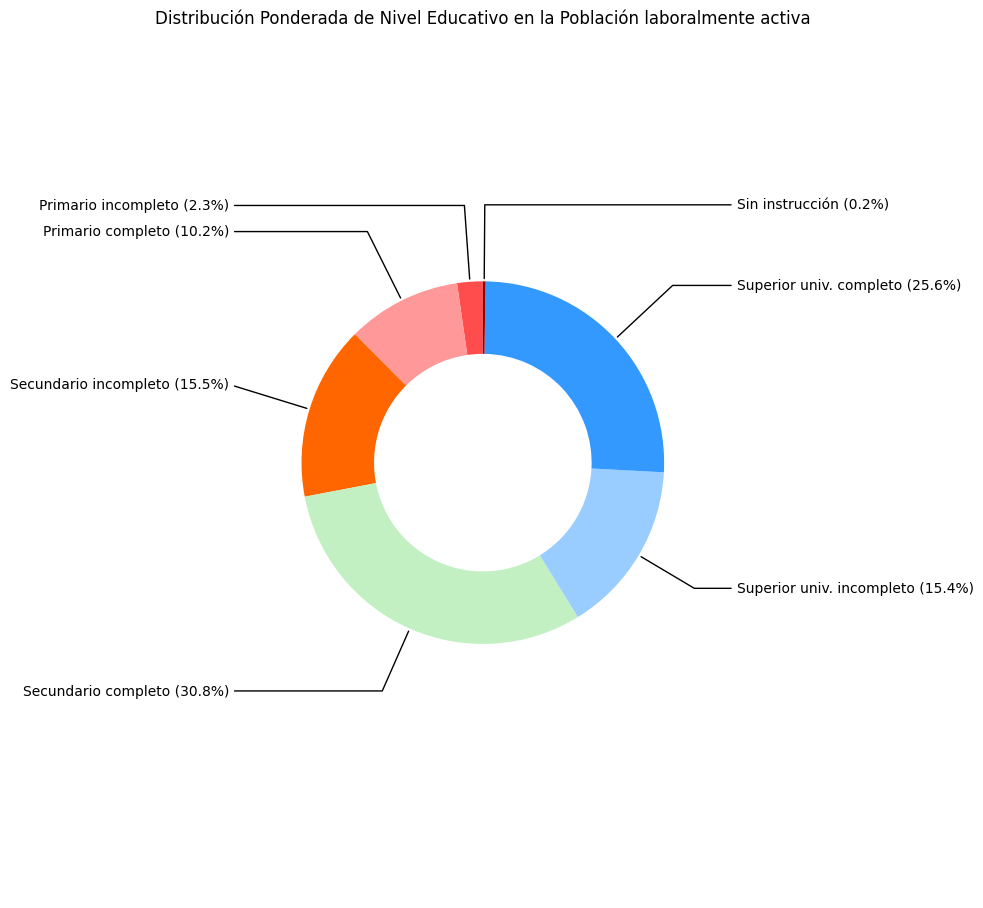

In [ ]:
# Mapeo de etiquetas
mapeo_nivel_ed = {
    1: 'Primario incompleto',
    2: 'Primario completo',
    3: 'Secundario incompleto',
    4: 'Secundario completo',
    5: 'Superior univ. incompleto',
    6: 'Superior univ. completo',
    7: 'Sin instrucción',
    9: 'Ns/Nr',
}

# Mapeo de colores
color_por_nivel = {
    1: '#ff4c4c',  # Primario incompleto
    2: '#ff9999',  # Primario completo
    3: '#ff6600',  # Secundario incompleto
    4: '#c2f0c2',  # Secundario completo
    5: '#99ccff',  # Superior univ. incompleto
    6: '#3399ff',  # Superior univ. completo
    7: '#990000',  # Sin instrucción
    9: '#cccccc',  # Ns/Nr
}

etiquetas = eph_educativa_activos_pond.index.map(mapeo_nivel_ed)
colors = eph_educativa_activos_pond.index.map(color_por_nivel)

# Crear gráfico de torta
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts = ax.pie(
    eph_educativa_activos_pond,
    startangle=90,
    wedgeprops=dict(width=0.4),
    colors=colors
)

# Calcular porcentajes
total = sum(eph_educativa_activos_pond)
porcentajes = [f'{(v/total)*100:.1f}%' for v in eph_educativa_activos_pond]

# Agregar etiquetas con flechas
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    ax.annotate(f'{etiquetas[i]} ({porcentajes[i]})',
                xy=(x, y),
                xytext=(1.4*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment,
                arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle))

# Título y formato
ax.set_title("Distribución Ponderada de Nivel Educativo en la Población laboralmente activa", pad=0)
plt.subplots_adjust(top=0.50)  # acercar el título al gráfico

ax.axis('equal')

plt.tight_layout()
plt.show()

In [ ]:
### Analizamos el nivel educativo obligatorio y superior para la población laboralmente activa

# La Ley de Educación Nacional (Ley 26.206) establece la obligatoriedad de estos niveles, garantizando la gratuidad de la enseñanza, según el gobierno argentino.

## Niveles Educativos Obligatorios:
# Nivel Inicial: A partir de los 4 años, con dos años de duración (4 y 5 años).
# Nivel Primario: De 6 o 7 años de duración, dependiendo de la jurisdicción, para niños de 6/7 a 11/13 años.
nivel_edu_obli_incompl = [1,2,3,7]
eph_educativa_activos_obli_incomp = eph_educativa_activos[eph_educativa_activos['NIVEL_ED'].isin(nivel_edu_obli_incompl)]
# Nivel Secundario: De 5 o 6 años de duración, dependiendo de la jurisdicción, para jóvenes de 11/13 a 17/18 años.
nivel_edu_obli_compl = [4,5]
eph_educativa_activos_obli_comp = eph_educativa_activos[eph_educativa_activos['NIVEL_ED'].isin(nivel_edu_obli_compl)]

## Nivel Educativo No Obligatorio:
# Nivel Superior: Incluye estudios terciarios y universitarios.
nivel_edu_uni_compl = [6]
eph_educativa_activos_uni_comp = eph_educativa_activos[eph_educativa_activos['NIVEL_ED'].isin(nivel_edu_uni_compl)]

print(f"Estudios obligatorios incompletos {eph_educativa_activos_obli_incomp['PONDERA'].sum()}")
print(f"Estudios obligatorios completos {eph_educativa_activos_obli_comp['PONDERA'].sum()}")
print(f"Estudios universitario completo {eph_educativa_activos_uni_comp['PONDERA'].sum()}")

Estudios obligatorios incompletos 4105613
Estudios obligatorios completos 6705610
Estudios universitario completo 3722008


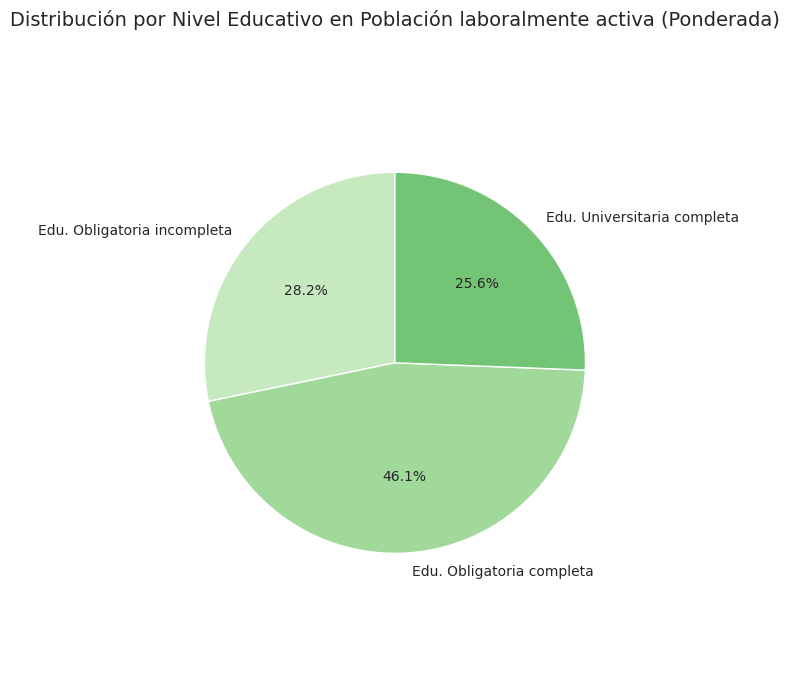

In [ ]:
# Obtenemos los valores ponderados
valores = [
    eph_educativa_activos_obli_incomp['PONDERA'].sum(),
    eph_educativa_activos_obli_comp['PONDERA'].sum(),
    eph_educativa_activos_uni_comp['PONDERA'].sum()
]

# Etiquetas
etiquetas = [
    'Edu. Obligatoria incompleta',
    'Edu. Obligatoria completa',
    'Edu. Universitaria completa'
]

# Colores personalizados
color_por_categoria = {
    'Edu. Obligatoria incompleta': '#c7e9c0',  # verde pastel claro
    'Edu. Obligatoria completa': '#a1d99b',    # verde pastel medio
    'Edu. Universitaria completa': '#74c476'   # verde pastel un poco más fuerte
}

colors = [color_por_categoria[etiqueta] for etiqueta in etiquetas]

# Configuramos el gráfico de torta
plt.figure(figsize=(7, 7))
plt.pie(valores,
        labels=etiquetas,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors)

plt.axis('equal')
plt.title('Distribución por Nivel Educativo en Población laboralmente activa (Ponderada)', pad=20, fontsize=14)
plt.tight_layout()
plt.show()

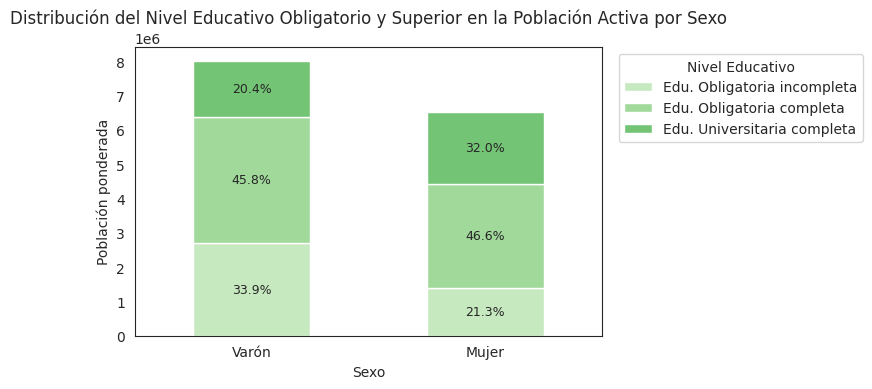

In [ ]:
# Colores verde pastel
color_por_categoria = {
    'Edu. Obligatoria incompleta': '#c7e9c0',  # verde pastel claro
    'Edu. Obligatoria completa': '#a1d99b',    # verde pastel medio
    'Edu. Universitaria completa': '#74c476'   # verde pastel un poco más fuerte
}

# Graficar
ax = df.plot(
    kind='bar',
    stacked=True,
    color=[color_por_categoria[col] for col in df.columns],
    figsize=(8, 4)
)

# Agregar etiquetas de porcentaje
for i, sexo in enumerate(df.index):
    total = df.loc[sexo].sum()
    y_offset = 0
    for col in df.columns:
        valor = df.loc[sexo, col]
        porcentaje = valor / total * 100
        if porcentaje > 3:  # solo si es significativo
            ax.text(i, y_offset + valor / 2, f'{porcentaje:.1f}%',
                    ha='center', va='center', fontsize=9)
        y_offset += valor

# Título y formato
plt.title('Distribución del Nivel Educativo Obligatorio y Superior en la Población Activa por Sexo')
plt.ylabel('Población ponderada')
plt.xlabel('Sexo')
plt.xticks(rotation=0)

# Leyenda a la derecha
plt.legend(title='Nivel Educativo', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


  <a id='2b-mercado-laboral'></a>
  ### 2.b Mercado Laboral



In [ ]:
# Copio otro dataframe, para la eph del mercado laboral, filtrado por columnas según lista campos_laboral
eph_laboral = eph.copy()

In [ ]:
# EPH Mercado laboral
# creamos un diccionario con los campos a utilizar para el estudio del mercado laboral, con su explicacion breve de cada uno.
# Aquí podremos agregar o quitar campos necesarios para este análisis

campos_laboral = [
    "CODUSU",        # Código único del hogar
    "H15",           # Codigo para distinguir hogares
    "ANO4",          # Año del relevamiento
    "TRIMESTRE",     # Trimestre del relevamiento (1 a 4)
    "REGION",        # Región estadística (NEA, NOA, Cuyo, Pampeana, etc.)
    "AGLOMERADO",    # Código del aglomerado urbano
    "PONDERA",       # Factor de expansión del individuo
    "CH04",          # Sexo (1 = varon, 2 = mujer)
    "CH06",          # Edad
    "CH08",          # Tiene cobertura medica
    "ESTADO",        # Condición de actividad: 1 = ocupado, 2 = desocupado, 3 = inactivo, 4 = menor 10 años
    "CAT_OCUP",      # Categoría ocupacional (patrón, asalariado, etc.)
    "CAT_INAC",      # Tipo de inactividad (jubilado, estudiante, etc.)
    "EMPLEO",        # Tipo de empleo del ocupado (formal, informal)
    "PP02B",         # Buscó trabajo en los ultimos 30 dias
    "PP02E",         # Motivo por el que NO buscó trabajo
    "PP02F",         # Buscó trabajo?
    "PP03I",         # Buscó trabajar mas horas en los últimos 30 días?
    "PP03K",         # Motivo de búsqueda laboral
    "INTENSI",       # Ocupado/subocupado
    "PP04A",         # Establecimiento donde traba es privado o publico
    "PP04A1",        # Nacional/provincial/municipal
    "PP04D_COD",     # Código de ocupación (Ver Clasificador Nacional de Ocupaciones
    "PP05B2_MES",    # ¿Cuánto tiempo hace que trabaja en ese empleo en forma continua? meses
    "PP05B2_ANO",    # ¿Cuánto tiempo hace que trabaja en ese empleo en forma continua? años
    "PP05B2_DIA",    # ¿Cuánto tiempo hace que trabaja en ese empleo en forma continua? días
    "PP07A",         # Tiempo de trabajo continuo
    "PP07G1",        # Tiene vacaciones pagas
    "PP07G2",        # Aguinaldo
    "PP07G3",        # Días pagos por enfermedad
    "PP07G4",        # Obra social
    "PP07H",         # Descuento jubilatorio
    "P21",           # Monto de ingreso de la ocupación principal
    "DECOCUR",       # N° de decil de ingreso de la ocupación principal del total EPH (ver Anexo I)
    "PONDIIO"        # Ponderador del ingreso de la ocupación principal (ver Anexo I)
]


In [ ]:
eph_laboral = eph_laboral[campos_laboral]

# Quitaremos aquellas filas que tienen la entrevista individual no realizada (H15)
eph_laboral = eph_laboral[eph_laboral['H15'] == 1]

# Quitaremos aquellos que en la variable ESTADO tienen un valor = 0 que significa encuesta no realizada y menores de 10 años
eph_laboral = eph_laboral[(eph_laboral['ESTADO'] != 0) & (eph_laboral['ESTADO'] != 4)]

# Convertimos los valores del campo ingreso (P21) a valor numérico y tomamos ingreso positivo
eph_laboral['P21'] = pd.to_numeric(eph_laboral['P21'], errors='coerce')
eph_laboral["P21"] > 0 & eph_laboral["P21"].notna()

# Transformaremos los valores de los campos ESTADO y Sexo
# Mapear valores de CH04 (sexo)
eph_laboral["CH04"] = eph_laboral["CH04"].replace({
    1: "varon",
    2: "mujer"
})

# Mapear valores de ESTADO (condición de actividad)
eph_laboral["ESTADO"] = eph_laboral["ESTADO"].replace({
    1: "Ocupado",
    2: "Desocupado",
    3: "Inactivo",

})

# Mapear valores de categoría ocupacional

eph_laboral["CAT_OCUP"] = eph_laboral["CAT_OCUP"].replace({
    1: "Patron",
    2: "Cuenta propia",
    3: "Obrero o empleado",
    4: "Trabajador familiar sin remuneración fija",
    9: "Ns/Nc"
})

# Mapear valores la variable INTENSI

eph_laboral["INTENSI"] = eph_laboral["INTENSI"].replace({
    1: "Subocupados horarios",
    2: "Ocupados Plenos",
    3: "Sobreocupados",
    4: "Ocupado que no trabajó en la semana"
})

# Agregar una nueva columna al data frame, que distingue entre trabajadores NO asalariados (Patrón, Cuenta propia y Trabajador familiar)
# y asalariados (obreros o empleados)
eph_laboral["TIPO_TRABAJO"] = eph_laboral["CAT_OCUP"].apply(
    lambda x: "Asalariado" if x == "Obrero o empleado" else
              ("Ns/Nc" if x == "Ns/Nc" else
               ("Fuera del mercado laboral" if x == 0 else "No asalariado"))
)

eph_laboral.info()


<class 'pandas.core.frame.DataFrame'>
Index: 41464 entries, 0 to 46859
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CODUSU        41464 non-null  object 
 1   H15           41464 non-null  int64  
 2   ANO4          41464 non-null  int64  
 3   TRIMESTRE     41464 non-null  int64  
 4   REGION        41464 non-null  int64  
 5   AGLOMERADO    41464 non-null  int64  
 6   PONDERA       41464 non-null  int64  
 7   CH04          41464 non-null  object 
 8   CH06          41464 non-null  int64  
 9   CH08          41464 non-null  int64  
 10  ESTADO        41464 non-null  object 
 11  CAT_OCUP      41464 non-null  object 
 12  CAT_INAC      41464 non-null  int64  
 13  EMPLEO        21132 non-null  float64
 14  PP02B         41464 non-null  int64  
 15  PP02E         41464 non-null  int64  
 16  PP02F         41464 non-null  int64  
 17  PP03I         21132 non-null  float64
 18  PP03K         21132 non-null  f

In [ ]:
# Mostramos los 3 valores NaN en variable Ingreso
eph_laboral[eph_laboral["P21"].isna()]


,CODUSU,H15,ANO4,TRIMESTRE,REGION,AGLOMERADO,PONDERA,CH04,CH06,CH08,...,PP07A,PP07G1,PP07G2,PP07G3,PP07G4,PP07H,P21,DECOCUR,PONDIIO,TIPO_TRABAJO
29225,TQRMNOPQUHLKKPCDEOJAH00856260,1,2024,4,44,93,87,mujer,31,1,...,6.00,1.00,1.00,1.00,1.00,1.00,NaN,10,163,Asalariado
34658,TQRMNORYRHJKOOCDEIIAD00876447,1,2024,4,1,32,684,varon,62,12,...,0.00,0.00,0.00,0.00,0.00,0.00,NaN,10,891,No asalariado
37575,TQRMNOPTUHJMKTCDEOJAH00876461,1,2024,4,44,93,53,varon,41,1,...,5.00,1.00,1.00,1.00,1.00,1.00,NaN,10,69,Asalariado


In [ ]:
# La variable P21 representa el ingreso y es una variable que tomaremos como principal para el análisis, por eso se toma la decisión de eliminar estos 3 valores que presentan ingreso nulo
eph_laboral = eph_laboral.dropna(subset=["P21"])

In [ ]:
# Análisis de columnas que tienen NaN

# Calcular cantidad y porcentaje de NaN por columna
tabla_nan = (
    eph_laboral.isna()
      .sum()
      .reset_index()  # para convertir a DataFrame
      .rename(columns={'index': 'columna', 0: 'faltantes'})
)

# Calcular porcentaje
tabla_nan['%_faltantes'] = (tabla_nan['faltantes'] / len(eph_laboral) * 100).round(2)

# Filtrar solo columnas con faltantes
tabla_nan = tabla_nan[tabla_nan['faltantes'] > 0]

# Ordenar de mayor a menor porcentaje de faltantes
tabla_nan = tabla_nan.sort_values(by='%_faltantes', ascending=False)

# Mostrar tabla
tabla_nan

,columna,faltantes,%_faltantes
13,EMPLEO,20332,49.04
17,PP03I,20332,49.04
18,PP03K,20332,49.04
19,INTENSI,20332,49.04
20,PP04A,20332,49.04
21,PP04A1,20332,49.04
22,PP04D_COD,20332,49.04
23,PP05B2_MES,20332,49.04
24,PP05B2_ANO,20332,49.04
25,PP05B2_DIA,20332,49.04


In [ ]:
eph_laboral['ESTADO'].value_counts()

,count
ESTADO,
Ocupado,21129
Inactivo,19090
Desocupado,1242


Observamos que hay una gran cantidad de NaN en las columnas de la salida de valores faltantes, pero se desestima su tratamiento ya que se verifica que estos registros poseen este resultado por ser población que se encuentra Desocupada o Inactiva

####Indicadores de mercado laboral (tomado como referencia de la pyeph)

**Cálculo de las tasas básicas**

- Tasa de empleo: calculada como porcentaje entre la población ocupada y la población total.
- Tasa de desocupación: calculada como porcentaje entre la poblaciÛn desocupada y la población econÛmicamente activa.
- Tasa de subocupación horaria: calculada como porcentaje entre la población
subocupada y la población econÛmicamente activa.

**Tasa de actividad**: calculada como porcentaje entre la población económicamente activa y la población total.

In [ ]:
# Calculamos de la variable ESTADO (condición de actividad), la cantidad total de población según sus categorías:

# (1) Ocupado
# (2) Desocupado
# (3) Inactivo
# (4) Menor de 10 años

eph_laboral.groupby('ESTADO')['PONDERA'].sum()

,PONDERA
ESTADO,
Desocupado,936747
Inactivo,11159315
Ocupado,13595660


In [ ]:
# Calculamos la particiapación relativa que tiene cada categoría de la variable Estado respecto del total
eph_laboral.groupby('ESTADO')['PONDERA'].sum()/eph_laboral['PONDERA'].sum()

porcentaje_relativo = (eph_laboral.groupby('ESTADO')['PONDERA'].sum() / eph_laboral['PONDERA'].sum()) * 100

# Redondear y agregar el símbolo %
porcentaje_relativo = porcentaje_relativo.round(2).apply(lambda x: f"{x}%")

porcentaje_relativo

,PONDERA
ESTADO,
Desocupado,3.65%
Inactivo,43.44%
Ocupado,52.92%


In [ ]:
# Calculamos la Población Económicamente Activa (PEA)

suma_estado = eph_laboral.groupby('ESTADO')['PONDERA'].sum()
PEA = suma_estado.loc['Ocupado'] + suma_estado.loc['Desocupado']

pob_total = eph_laboral['PONDERA'].sum()

tasa_actividad = ((PEA/pob_total)).round(4)

print(f"Población total: {pob_total} personas")
print(f"Poblacion economicamente activa: {PEA} personas")
print('\n')
print(f"Tasa de actividad: {(tasa_actividad)*100:.2f}%")

Población total: 25691722 personas
Poblacion economicamente activa: 14532407 personas


Tasa de actividad: 56.56%


**Tasa de Ocupación**: Porcentaje entre la población empleada y la población total

In [ ]:
# Presentamos la Tasa de Ocupación como porcentaje (TO_porcentaje)
poblacion_total = eph_laboral['PONDERA'].sum()
tasa_ocupacion = (eph_laboral.groupby('ESTADO')['PONDERA'].sum()['Ocupado']/pob_total).round(4)

print(f"Tasa de Ocupación: {tasa_ocupacion*100:.2f}%")

Tasa de Ocupación: 52.92%


**Tasa de empleo**: calculada como porcentaje entre la población ocupada y la población económicamente activa.

In [ ]:
tasa_empleo = (eph_laboral.groupby('ESTADO')['PONDERA'].sum()['Ocupado']/PEA).round(4)


print(f"Tasa de Empleo: {tasa_empleo*100:.2f}%")

Tasa de Empleo: 93.55%


**Tasa de desempleo**: Porcentaje de personas que, estando disponibles y en búsqueda activa de trabajo, no lo poseen

In [ ]:
tasa_desempleo = (eph_laboral.groupby('ESTADO')['PONDERA'].sum()['Desocupado']/PEA).round(4)

print(f"Tasa de Desempleo: {tasa_desempleo*100:.2f}%")

Tasa de Desempleo: 6.45%


In [ ]:
# Calculamos la participación relativa por categoría de la variable ESTADO, según SEXO
participacion_rel = pd.crosstab(
    eph_laboral['CH04'],
    eph_laboral['ESTADO'],
    eph_laboral['PONDERA'],
    margins=True, aggfunc= 'sum', dropna= True, normalize= 'columns').round(4)

(participacion_rel * 100)

ESTADO,Desocupado,Inactivo,Ocupado,All
CH04,,,,
mujer,47.69,60.41,44.66,51.61
varon,52.31,39.59,55.34,48.39


In [ ]:
# Aquí calculamos la Población Económicamente Activa según Sexo
#(1)Hombres
#(2)Mujeres
#(All=PEA total)
ocupacion_sexo = pd.crosstab(
    eph_laboral['CH04'],
    eph_laboral['ESTADO'],
    eph_laboral['PONDERA'],
    margins=True, aggfunc= 'sum', dropna= True).round(4)

pea_varon = ocupacion_sexo.loc['varon','Ocupado'] + ocupacion_sexo.loc['varon','Desocupado']
pea_mujer = ocupacion_sexo.loc['mujer','Ocupado'] + ocupacion_sexo.loc['mujer','Desocupado']

print(f"La Población Económicamente Activa por sexo se compone de: {pea_varon} hombres y {pea_mujer} mujeres")

La Población Económicamente Activa por sexo se compone de: 8013643 hombres y 6518764 mujeres


In [ ]:
# Aquí calculamos la tasa de desempleo abierta total y por sexo
#(1)Tasa desempleo Hombres
#(2)Tasa desempleo Mujeres
#(All) Tasa Desempleo Total

tasa_desempleo_varon = ((ocupacion_sexo.loc['varon','Desocupado']/pea_varon)*100).round(2)
tasa_desempleo_mujer = ((ocupacion_sexo.loc['mujer','Desocupado']/pea_mujer)*100).round(2)

# tasa_desempleo_sexo = (estado_ocup_sexo['Desocupado']/pea_sexo)*100

print(f"La tasa de desocupación de hombres es de {tasa_desempleo_varon} y de mujeres es de {tasa_desempleo_mujer}")

La tasa de desocupación de hombres es de 6.11 y de mujeres es de 6.85


In [ ]:
# Vemos aquí A LOS TRABAJADORES POR INTENSIDAD DE OCUPACIÓN: SON LOS SUBOCUPADOS HORARIOS, SOBREOCUPADOS OCUPADOS PLENOS, OCUPADOS QUE NO TRABAJÓ EN LA SEMANA
#(1) SUBOCUPADOS HORARIOS
#(2) OCUPADOS PLENOS
#(3) SOBREOCUPADOS
#(4) OCUPADOS QUE NO TRABAJÓ EN LA SEMANA
eph_laboral.groupby('INTENSI')['PONDERA'].sum()


,PONDERA
INTENSI,
Ocupado que no trabajó en la semana,276290
Ocupados Plenos,7709135
Sobreocupados,3968864
Subocupados horarios,1641371


In [ ]:
# Vemos las Tasas para SUBOCUPADOS HORARIOS, SOBREOCUPADOS OCUPADOS PLENOS, OCUPADOS QUE NO TRABAJÓ EN LA SEMANA
#(1) TASA SUBOCUPADOS HORARIOS
#(2) TASA OCUPADOS PLENOS
#(3) TASA SOBREOCUPADOS
#(4) TASA OCUPADOS QUE NO TRABAJÓ EN LA SEMANA
porcentajes1 = (eph_laboral.groupby('INTENSI')['PONDERA'].sum() /PEA) * 100

# Redondear y agregar el símbolo %
porcentajes1 = porcentajes1.round(1).apply(lambda x: f"{x}%")

porcentajes1

,PONDERA
INTENSI,
Ocupado que no trabajó en la semana,1.9%
Ocupados Plenos,53.0%
Sobreocupados,27.3%
Subocupados horarios,11.3%


In [ ]:
# Vemos ahora, DENTRO DE LA POBLACIÓN ECONÓMICAMENE ACTIVA las CATEGORÍAS DE OCUPACIÓN
#0 = (Para ocupados y desocupados con ocupación anterior)
#1 = Patrón
#2 = Cuenta propia
#3 = Obrero o empleado
#4 = Trabajador familiar sin remuneración
#9 = Ns/Nr"

eph_laboral.groupby('CAT_OCUP')['PONDERA'].sum()

,PONDERA
CAT_OCUP,
0,11353978
Cuenta propia,3384266
Ns/Nc,6981
Obrero o empleado,10410585
Patron,487312
Trabajador familiar sin remuneración fija,48600


In [ ]:
eph_laboral.groupby('CAT_OCUP')['PONDERA'].sum()/ eph_laboral['PONDERA'].sum()
porcentajes = (eph_laboral.groupby('CAT_OCUP')['PONDERA'].sum() /PEA) * 100

# Redondear y agregar el símbolo %
porcentajes = porcentajes.round(2).apply(lambda x: f"{x}%")

porcentajes


,PONDERA
CAT_OCUP,
0,78.13%
Cuenta propia,23.29%
Ns/Nc,0.05%
Obrero o empleado,71.64%
Patron,3.35%
Trabajador familiar sin remuneración fija,0.33%


In [ ]:
eph_laboral.groupby('TIPO_TRABAJO')['PONDERA'].sum()

,PONDERA
TIPO_TRABAJO,
Asalariado,10410585
Fuera del mercado laboral,11353978
No asalariado,3920178
Ns/Nc,6981


  <a id='2c-ingresos'></a>
  ### 2.c Ingresos

In [ ]:
# Creamos un diccionario con los campos a utilizar para el estudio del los ingresos de la población, con su explicacion breve de cada uno.
# Aquí podremos agregar o quitar campos necesarios para este análisis

campos_ingreso = [
    "CODUSU",        # Código único del hogar
    "H15",           # Codigo para distinguir hogares
    "ANO4",          # Año del relevamiento
    "TRIMESTRE",     # Trimestre del relevamiento (1 a 4)
    "REGION",        # Región estadística (NEA, NOA, Cuyo, Pampeana, etc.)
    "AGLOMERADO",    # Código del aglomerado urbano
    "PONDERA",       # Factor de expansión del individuo
    "CH03",          # Relación de parentesco
    "CH04",          # Sexo (1 = varon, 2 = mujer)
    "CH06",          # Edad
    "CH08",          # Tiene cobertura medica
    "CH09",          # Sabe leer y escribir?
    "CH14",          # Ultimo año aprobado
    "CH15",          # ¿Dónde nació?
    "NIVEL_ED",       # Nivel Educativo
    "ESTADO",        # Condición de actividad: 1 = ocupado, 2 = desocupado, 3 = inactivo, 4 = menor 10 años
    "CAT_OCUP",      # Categoría ocupacional (patrón, asalariado, etc.)
    "CAT_INAC",      # Tipo de inactividad (jubilado, estudiante, etc.)
    "EMPLEO",        # Tipo de empleo del ocupado (formal, informal)
    "PP04A",         # Establecimiento donde trabaja es privado o publico
    "PP04A1",        # Nacional/provincial/municipal
    "PP04B_COD",     # ¿A qué se dedica o produce el negocio/empresa/institución? (Ver Clasificador de Actividades Económicas para Encuestas Sociodemográficas del Mercosur, CAES-Mercosur)
    "PP04D_COD",     # Código de ocupación (Ver Clasificador Nacional de Ocupaciones
    "PP05I",         # En los últimos 3 meses, por este trabajo, ¿realizó aportes como...
    "PP07A",         # Tiempo de trabajo continuo
    "P21",           # Monto de ingreso de la ocupación principal
    "DECOCUR",       # N° de decil de ingreso de la ocupación principal del total EPH (ver Anexo I)
    "IDECOCUR",      # N° de decil de ingreso de la ocupación principal del interior EPH (ver Anexo I)
    "RDECOCUR",      # N° de decil de ingreso de la ocupación principal de la región (ver Anexo I)
    "GDECOCUR",      # N° de decil de ingreso de la ocupación principal del conjunto de aglomerados de 500.000 y más habitantes (ver Anexo I)
    "PDECOCUR",      # N° de decil de ingreso de la ocupación principal del conjunto de aglomerados de menos de 500.000 habitantes (ver Anexo I)
    "ADECOCUR",      # N° de decil de ingreso de la ocupación principal del aglomerado (ver Anexo I)
    "PONDIIO",       # Ponderador del ingreso de la ocupación principal (ver Anexo I)
    "TOT_P12",       # Monto de ingreso de otras ocupaciones
    "PP3E_TOT",      # Total de horas que trabajó en la semana en la ocupación principal
    "PP3F_TOT"       #  Total de horas que trabajó en la semana en otras ocupaciones
]


In [ ]:
# Genero una copia del DF original, a fin de poder realizarle los ajustes que considere necesarios
eph_ingreso = eph.copy()

In [ ]:
eph_ingreso = eph_ingreso[campos_ingreso]

# Quitaremos aquellas filas que tienen la entrevista individual no realizada (H15)
eph_ingreso = eph_ingreso[eph_ingreso['H15'] == 1]

# Quitaremos aquellos que en la variable ESTADO tienen un valor = 0 que significa encuesta no realizada
eph_ingreso = eph_ingreso[eph_ingreso['ESTADO'] != 0]

# Convertimos los valores del campo ingreso (P21) a valor numérico, quitando tambien los NaN
eph_ingreso['P21'] = pd.to_numeric(eph_ingreso['P21'], errors='coerce')

In [ ]:
# Transformación de variables:
# Serán cambiados por su nombre los valores de los campos ESTADO, Sexo, Region y Nivel Educativo

# Mapear valores de CH04 (sexo)
eph_ingreso["CH04"] = eph_ingreso["CH04"].replace({
    1: "varon",
    2: "mujer"
})

# Mapear valores de ESTADO (condición de actividad)
eph_ingreso["ESTADO"] = eph_ingreso["ESTADO"].replace({
    1: "Ocupado",
    2: "Desocupado",
    3: "Inactivo",
    4: "Menor de 10 años"
})

# Reemplazamos los códigos de región por sus nombres

eph_ingreso["REGION"] = eph_ingreso["REGION"].replace({
    1: "GBA",
    40: "Noroeste",
    41: "Noreste",
    42: "Cuyo",
    43: "Pampeana",
    44: "Patagonia"
})

# Creamos categoría educativa simplificada

def categorizar_educacion(nivel):
    try:
        nivel = int(nivel)
    except:
        return 'Otro'

    if nivel == 1:
        return '2 - Primario incompleto'
    elif nivel == 2:
        return '3 - Primario completo'
    elif nivel == 3:
        return '4 - Secundario incompleto'
    elif nivel == 4:
        return '5 - Secundario completo'
    elif nivel == 5:
        return '6 - Universitario incompleto'
    elif nivel == 6:
        return '7 - Universitario completo'
    elif nivel == 7:
        return '1 - Sin instrucción'
    else:
        return 'Otro'

eph_ingreso['NIVEL_ED'] = eph_ingreso['NIVEL_ED'].apply(categorizar_educacion)

eph_ingreso

,CODUSU,H15,ANO4,TRIMESTRE,REGION,AGLOMERADO,PONDERA,CH03,CH04,CH06,...,DECOCUR,IDECOCUR,RDECOCUR,GDECOCUR,PDECOCUR,ADECOCUR,PONDIIO,TOT_P12,PP3E_TOT,PP3F_TOT
0,TQRMNORTSHJKLMCDEHPJB00872828,1,2024,4,Noroeste,29,384,2,varon,79,...,0,0.00,0,0.00,NaN,0,384,0.00,NaN,NaN
1,TQRMNOSRQHJLLNCDEHPJB00872829,1,2024,4,Noroeste,29,265,1,mujer,23,...,0,0.00,0,0.00,NaN,0,265,0.00,NaN,NaN
2,TQRMNOSRQHJLLNCDEHPJB00872829,1,2024,4,Noroeste,29,265,10,mujer,20,...,0,0.00,0,0.00,NaN,0,265,0.00,NaN,NaN
3,TQRMNOSQTHMKLQCDEHPJB00872830,1,2024,4,Noroeste,29,380,1,varon,30,...,9,9.00,10,9.00,NaN,10,480,0.00,70.00,0.00
4,TQRMNOSQTHMKLQCDEHPJB00872830,1,2024,4,Noroeste,29,380,2,mujer,30,...,5,5.00,7,5.00,NaN,7,517,0.00,30.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46855,TQRMNOQUTHJOLNCDEOJAH00877594,1,2024,4,Patagonia,93,102,1,mujer,68,...,0,0.00,0,NaN,0.00,0,102,0.00,NaN,NaN
46856,TQRMNOQUTHJOLNCDEOJAH00877594,1,2024,4,Patagonia,93,102,2,varon,76,...,0,0.00,0,NaN,0.00,0,102,0.00,NaN,NaN
46857,TQRMNORQUHLKKNCDEHJGH00853851,1,2024,4,Noroeste,23,208,1,mujer,64,...,0,0.00,0,0.00,NaN,0,208,0.00,NaN,NaN
46858,TQSMNOSTSHJOLPCDEHPJB00877595,1,2024,4,Noroeste,29,500,1,varon,34,...,12,12.00,12,12.00,NaN,12,0,-9.00,20.00,0.00


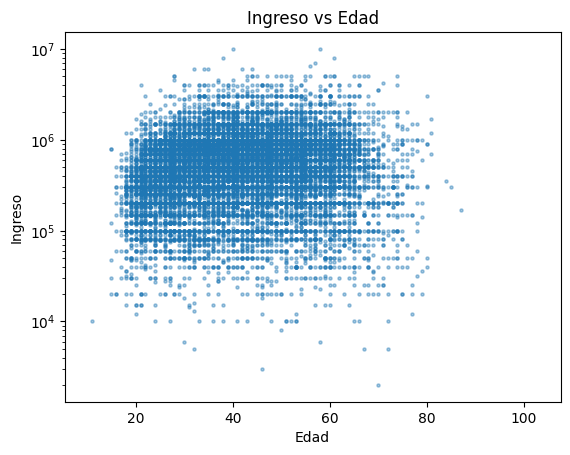

In [ ]:
# Filtros sobre la variable ingreso

# Con un Scatter Plot de Ingresos vs Edad, podemos ver si hay valores atipicos, por ser de edades avanzadas, menores de edad, o negativos
plt.scatter(eph_ingreso["CH06"], eph_ingreso["P21"], alpha=0.4, s=5)
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.title("Ingreso vs Edad")
plt.yscale("log")
plt.show()

In [ ]:
# Sobre el monto del ingreso, revisamos aquellos valores que parecieran ser muy bajos, para comprobar la presencia de ingreso negativo
eph_ingreso[eph_ingreso["P21"] < 0]

# Filtramos los registros que sean menores o iguales a 0, para sacarlos de nuestro DF.
# Solo queremos a las personas que reporten al menos un peso de ingreso en su ocupación principal
eph_ingreso = eph_ingreso[eph_ingreso["P21"] > 0]

In [ ]:
# En general, están todos los valores contenidos entre los 20 y 80 años de edad. Pareciera que hay algunos valores que escapan a esta regla
# Revisamos los los registros de personas menores a 18 años

print("Individuos de la muestra menores de 16 años con ingresos \n ")
print( eph_ingreso[(eph_ingreso["CH06"] <16) & (eph_ingreso["P21"]!=0) ][["REGION","CH06", "PP3E_TOT" ,"P21"]])

print('\n')

print("Individuos de la muestra de entre 16 y 17 con ingresos \n")
print( eph_ingreso[(eph_ingreso["CH06"] >=16) & (eph_ingreso["CH06"] <=17) & (eph_ingreso["P21"]!=0) ][["REGION","CH06", "PP3E_TOT" ,"P21"]])

Individuos de la muestra menores de 16 años con ingresos 
 
         REGION  CH06  PP3E_TOT        P21
9362        GBA    15     48.00 800,000.00
12352  Pampeana    15      3.00  30,000.00
13914       GBA    11     12.00  10,000.00
20506  Pampeana    15      6.00  48,000.00
23981  Pampeana    15      8.00 800,000.00
31577  Noroeste    15      9.00 120,000.00
38834       GBA    15      3.00  20,000.00


Individuos de la muestra de entre 16 y 17 con ingresos 

          REGION  CH06  PP3E_TOT        P21
924          GBA    16     21.00 500,000.00
1882    Pampeana    17     30.00 400,000.00
2820         GBA    17      8.00  40,000.00
3625    Pampeana    17     12.00 168,000.00
5403    Noroeste    17     30.00 240,000.00
7993         GBA    17     36.00 600,000.00
9151    Noroeste    17     40.00 225,000.00
11291   Noroeste    16      4.00 400,000.00
12127   Pampeana    17     40.00 500,000.00
14013   Pampeana    17     40.00 700,000.00
16522   Pampeana    17     20.00  90,000.00
16747   P

Ha sido probado en diversos estudios que la variable P21, que muestra el ingreso de la persona en su ocupación principal, tiene una subdeclaración de su monto por parte del encuestado. Es por esto que se realiza un ajuste de los ingresos de la ocupación principal, con coeficientes de ajuste por decil del ingreso del encuestado de acuerdo a Albina, I., et al (2024).
La nueva variable será guardada en la columna "P21_ajustada"

In [ ]:
# Tabla de coeficientes
coef_df = pd.DataFrame({
    "DECOCUR": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "coef_ajuste": [1.42, 1.28, 1.25, 1.25, 1.26, 1.29, 1.33, 1.41, 1.51, 2.23]
})

# Unir coeficientes por DECOCUR
eph_ingreso = eph_ingreso.merge(coef_df, on="DECOCUR", how="left")

# Ajustar P21
eph_ingreso["P21_ajustada"] = eph_ingreso["P21"] * eph_ingreso["coef_ajuste"]

print(eph_ingreso)

                              CODUSU  H15  ANO4  TRIMESTRE     REGION  \
0      TQRMNOSQTHMKLQCDEHPJB00872830    1  2024          4   Noroeste   
1      TQRMNOSQTHMKLQCDEHPJB00872830    1  2024          4   Noroeste   
2      TQRMNOPYTHLMKOCDEIHJF00854747    1  2024          4  Patagonia   
3      TQRMNOPYTHLMKOCDEIHJF00854747    1  2024          4  Patagonia   
4      TQRMNOQQSHKKPPCDEIJAH00872831    1  2024          4        GBA   
...                              ...  ...   ...        ...        ...   
16444  TQRMNORPPHKMKPCDEGKDB00872026    1  2024          4   Pampeana   
16445  TQRMNORPPHKMKPCDEGKDB00872026    1  2024          4   Pampeana   
16446  TQRMNOQXPHLLKPCDEGKDB00853120    1  2024          4   Pampeana   
16447  TQRMNOQXPHLLKPCDEGKDB00853120    1  2024          4   Pampeana   
16448  TQSMNOSTSHJOLPCDEHPJB00877595    1  2024          4   Noroeste   

       AGLOMERADO  PONDERA  CH03   CH04  CH06  ...  RDECOCUR  GDECOCUR  \
0              29      380     1  varon    30  ..

In [ ]:
# Revisar si quedaron NaN luego del calculo de la nueva columna
eph_ingreso["P21_ajustada"].isna().sum()

np.int64(0)

In [ ]:
eph_ingreso['P21_ajustada'].describe()

,P21_ajustada
count,"16,449.00"
mean,"1,008,678.86"
std,"1,294,622.15"
min,"2,840.00"
25%,"350,000.00"
50%,"630,000.00"
75%,"1,128,000.00"
max,"22,300,000.00"


In [ ]:
# Promedio ponderado P21_ajustada con PONDERA
prom_P21aj = (eph_ingreso['P21_ajustada'] * eph_ingreso['PONDERA']).sum() / eph_ingreso['PONDERA'].sum()

# Resultado
print(f"Promedio ponderado P21_ajustada: {prom_P21aj:,.2f}")

Promedio ponderado P21_ajustada: 1,145,489.10


In [ ]:
# Promedio del Ingreso ajustado, por decil del ingreso
prom_por_decil = eph_ingreso.groupby('DECOCUR').apply(
    lambda x: (x['P21_ajustada'] * x['PONDERA']).sum() / x['PONDERA'].sum()
).reset_index()
prom_por_decil.columns = ['Decil', 'Promedio de ingresos']

print(prom_por_decil)

   Decil  Promedio de ingresos
0      1            100,790.51
1      2            230,280.42
2      3            358,118.42
3      4            494,190.79
4      5            632,979.20
5      6            815,046.69
6      7          1,019,659.39
7      8          1,289,666.31
8      9          1,749,581.57
9     10          4,820,025.66


/tmp/ipython-input-4193213024.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prom_por_decil = eph_ingreso.groupby('DECOCUR').apply(


In [ ]:
# Ingreso medio por sexo
eph_ingreso.groupby('CH04').apply(
    lambda x: (x['P21_ajustada'] * x['PONDERA']).sum() / x['PONDERA'].sum()
)

# Comienza aquí a comprobarse la desigualdad salarial entre sexos

/tmp/ipython-input-3005904377.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  eph_ingreso.groupby('CH04').apply(


,0
CH04,
mujer,"926,226.72"
varon,"1,329,224.33"


In [ ]:
# Composición de los deciles del ingreso por sexo
composicion_deciles= pd.crosstab(eph_ingreso['DECOCUR'], eph_ingreso['CH04'], eph_ingreso['PONDERA'], margins=False, aggfunc='sum', dropna= True, normalize='index')
composicion_deciles.columns =['% Mujeres','% Hombres']
composicion_deciles = composicion_deciles.reset_index().rename(columns={'DECOCUR': 'Decil'})
print(composicion_deciles)

# Los deciles van cambiando su composición a medida que se avanza en el nivel de ingreso percibido.
# En los deciles mas bajos, se percibe una gran concentración de mujeres. Estos porcentajes se van invirtiendo
# a medida que se avanza en el ingreso percibido por el encuestado, llegando a ser en el decil 10, de más alto ingreso
# donde más diferencias hay entre cantidad de hombres y de mujeres que pertenecen a este grupo.

   Decil  % Mujeres  % Hombres
0      1       0.69       0.31
1      2       0.60       0.40
2      3       0.51       0.49
3      4       0.46       0.54
4      5       0.47       0.53
5      6       0.41       0.59
6      7       0.39       0.61
7      8       0.37       0.63
8      9       0.34       0.66
9     10       0.33       0.67


In [ ]:
# Cálculo del promedio ponderado
def promedio_ponderado(x, valor, peso):
    return (x[valor] * x[peso]).sum() / x[peso].sum()

# Crosstab: ingreso medio ponderado de P21_AJUSTADA por sexo y decil
tabla_ingresos = pd.crosstab(
    index=eph_ingreso['CH04'],
    columns=eph_ingreso['DECOCUR'],
    values=eph_ingreso['P21_ajustada'],
    aggfunc=lambda s: promedio_ponderado(eph_ingreso.loc[s.index], 'P21_ajustada', 'PONDERA')
)

tabla_ingresos

# Incluso al analizar dentro de cada decil, podemos afirmar, salvo excepciones, que los hombres ganan en promedio mas que las mujeres

DECOCUR,1,2,3,4,5,6,7,8,9,10
CH04,,,,,,,,,,
mujer,"99,758.41","225,056.91","356,114.10","493,119.64","635,388.39","819,837.66","1,019,294.16","1,288,960.36","1,731,414.09","4,674,325.49"
varon,"103,130.11","238,144.69","360,176.98","495,094.93","630,851.06","811,740.87","1,019,891.92","1,290,078.54","1,758,961.81","4,891,238.37"


In [ ]:
# Ingresos por franja etaria

bins = [0, 17, 24, 34, 44, 54, 64, 120]
labels_edad = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
eph_ingreso['rango_edad'] = pd.cut(eph_ingreso['CH06'], bins=bins, labels=labels_edad, right=True)

ingreso_por_edad = eph_ingreso.groupby('rango_edad').apply(
    lambda x: (x['P21_ajustada'] * x['PONDERA']).sum() / x['PONDERA'].sum()
)
print(ingreso_por_edad)
# Las personas reportan sus mayores ingresos entre los 35 y 44 años, pasada su etapa de formación y teniendo todavía una alta productividad.

# En la sección de presentación de datos se muestra un gráfico con la evolución del salario con los años

rango_edad
<18       399,288.10
18-24     642,456.44
25-34     991,617.92
35-44   1,341,319.97
45-54   1,271,805.25
55-64   1,218,941.72
65+     1,130,175.38
dtype: float64


/tmp/ipython-input-3290143968.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ingreso_por_edad = eph_ingreso.groupby('rango_edad').apply(
/tmp/ipython-input-3290143968.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ingreso_por_edad = eph_ingreso.groupby('rango_edad').apply(


In [ ]:
# Ingresos por nivel educativo
prom_por_nivel = eph_ingreso.groupby('NIVEL_ED').apply(
    lambda x: (x['P21_ajustada'] * x['PONDERA']).sum() / x['PONDERA'].sum()
).reset_index(name='promedio_ponderado')

print(prom_por_nivel)

# A medida que las personas completan niveles educativos, se perciben retornos sobre la educación,
# teniendo mayores posibilidades de recibir mejores salarios

# En la sección de presentación de datos se muestra un gráfico con la evolución del salario al completar niveles educativos

                       NIVEL_ED  promedio_ponderado
0           1 - Sin instrucción          461,467.97
1       2 - Primario incompleto          477,191.90
2         3 - Primario completo          585,503.34
3     4 - Secundario incompleto          740,730.42
4       5 - Secundario completo          956,641.33
5  6 - Universitario incompleto        1,084,895.83
6    7 - Universitario completo        1,900,084.34


/tmp/ipython-input-1859458543.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prom_por_nivel = eph_ingreso.groupby('NIVEL_ED').apply(


<a id='3._Presentación_de_los_datos'></a>


## 3. Presentación de los datos

Pirámide poblacional

/tmp/ipython-input-4291594408.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = eph_piramide.groupby(["grupo_edad", "sexo"])["PONDERA"].sum().unstack().fillna(0)


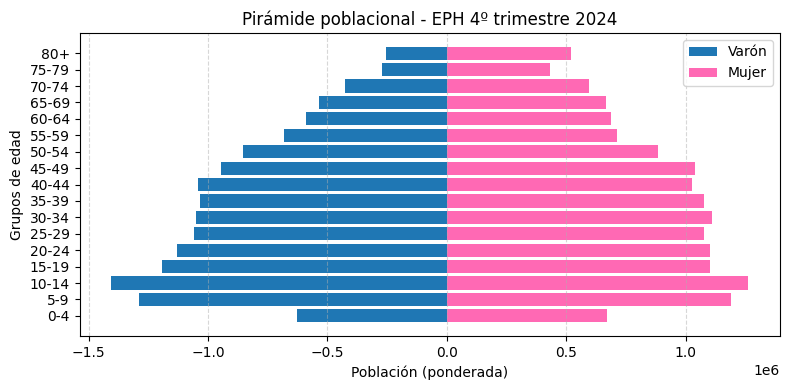

In [ ]:
# Filtrar columnas necesarias
eph_piramide = eph.copy()

eph_piramide = eph_piramide[["CH04", "CH06", "PONDERA"]]

# Eliminar edades faltantes
eph_piramide = eph_piramide[eph_piramide["CH06"].notna()]

# Agrupar edades de 5 en 5 hasta 80+
bins = list(range(0, 85, 5)) + [200]
labels = [f"{i}-{i+4}" for i in range(0, 80, 5)] + ["80+"]

eph_piramide["grupo_edad"] = pd.cut(eph["CH06"], bins=bins, labels=labels, right=False)

# Separar por sexo
# En CH04: 1 = varón, 2 = mujer
eph_piramide["sexo"] = eph_piramide["CH04"].map({1: "Varón", 2: "Mujer"})

# Agrupar y sumar ponderador
grupo = eph_piramide.groupby(["grupo_edad", "sexo"])["PONDERA"].sum().unstack().fillna(0)

# Negar los varones para que vayan hacia la izquierda
grupo["Varón"] = -grupo["Varón"]

# Plot
fig, ax = plt.subplots(figsize=(8, 4))

# Parámetros
bar_height = 0.8  # default ~0.8, podés probar con 0.9 o incluso 1.0

# Posiciones de las barras
y = np.arange(len(grupo))

# Plot manual con control de height
ax.barh(y, grupo["Varón"], height=bar_height, color="#1f77b4", label="Varón")
ax.barh(y, grupo["Mujer"], height=bar_height, color="#ff69b4", label="Mujer")

# Ajustes del eje y
ax.set_yticks(y)
ax.set_yticklabels(grupo.index)

# Títulos y estilos
ax.set_title("Pirámide poblacional - EPH 4º trimestre 2024")
ax.set_xlabel("Población (ponderada)")
ax.set_ylabel("Grupos de edad")
ax.legend(loc="upper right")
ax.grid(True, axis="x", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

Intensidad laboral

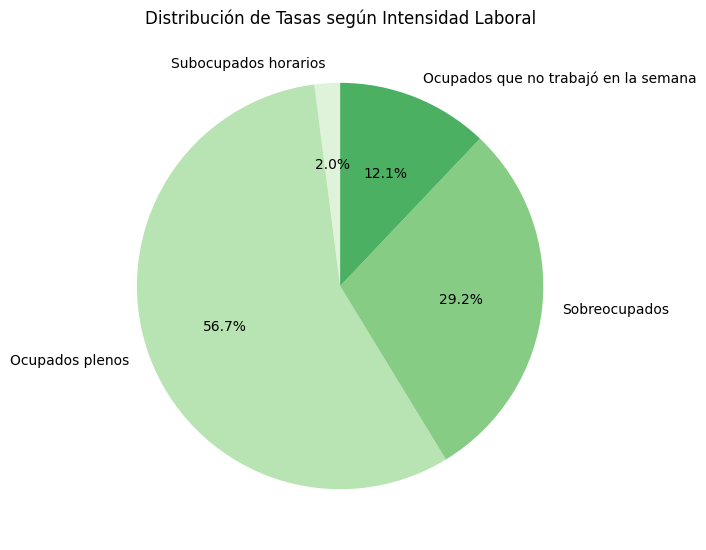

In [ ]:
# Convertir los porcentajes de string "12.3%" a valores numéricos
valores = porcentajes1.str.replace('%', '').astype(float)

# Etiquetas
labels = [
    "Subocupados horarios",
    "Ocupados plenos",
    "Sobreocupados",
    "Ocupados que no trabajó en la semana"
]

# Verdes pastel MUY claros (usando las zonas iniciales del colormap)
colors = plt.cm.Greens(np.linspace(0.15, 0.60, len(valores)))

plt.figure(figsize=(7, 7))
plt.pie(
    valores,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)

plt.title('Distribución de Tasas según Intensidad Laboral')
plt.tight_layout()
plt.show()

Histograma de distibución de los ingresos

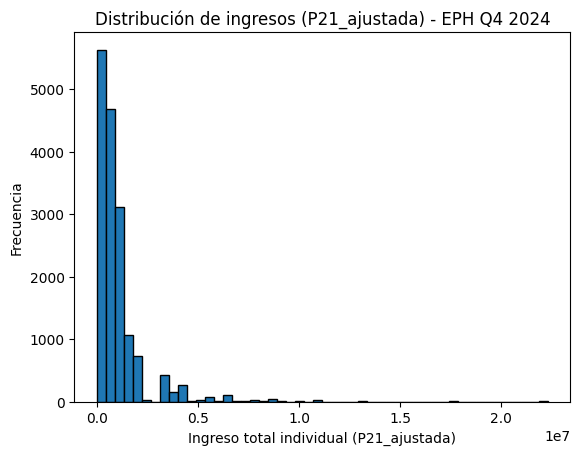

In [ ]:
plt.hist(eph_ingreso['P21_ajustada'], bins=50, edgecolor='black')
plt.xlabel('Ingreso total individual (P21_ajustada)')
plt.ylabel('Frecuencia')
plt.title('Distribución de ingresos (P21_ajustada) - EPH Q4 2024')
#plt.xlim(0, eph_ingreso['P21_ajustada'].quantile(0.95))  # recorta el 5% más alto
plt.show()

# La gran mayoría de las personas se concentran en los deciles más bajos del ingreso

Distribución de los ingresos por región

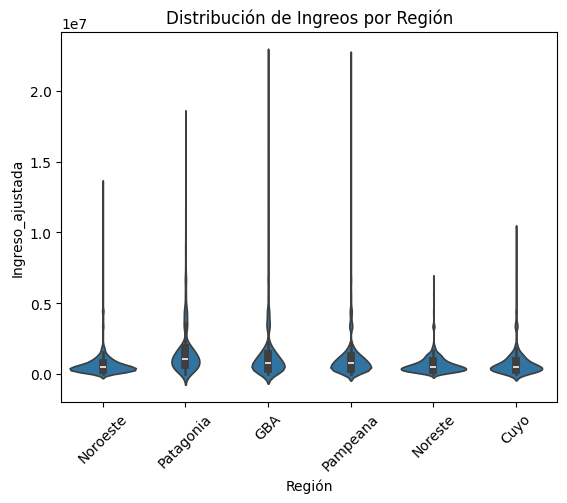

In [ ]:
# Grafico exploratorio sobre la variable P21_ajustada vs la region donde vive le encuestado

sns.violinplot(x="REGION", y="P21_ajustada", data=eph_ingreso, inner="box")
plt.xlabel("Región")
plt.ylabel("Ingreso_ajustada")
plt.xticks(rotation=45)
plt.ylabel("Ingreso_ajustada")
plt.title("Distribución de Ingreos por Región")
plt.show()

# Puede apreciarse que las regiones Cuyo, NOA y NEA son las que concentran la población de mas bajos ingresos, debido a la densidad del tramo azul de sus figuras,
# mientras que GBA, región Pampeana y la Patagonia son aquellas regiones que poseen individiuos que reportan ingresos significativamente mas elevados que el resto,
# y con una densidad menor en los niveles inferiores del ingreso

Ingresos por edad

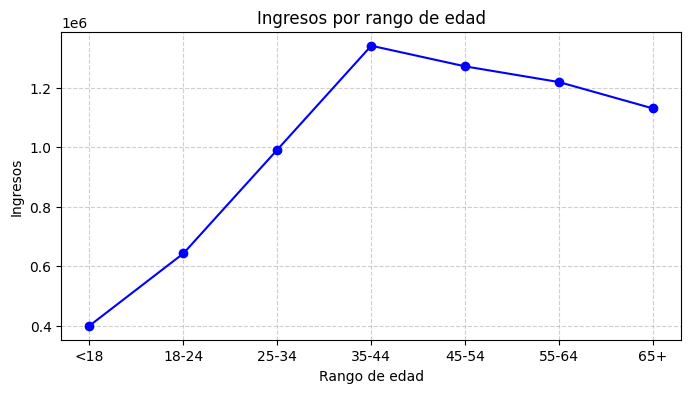

In [ ]:
# Grafico exploratorio sobre la variable P21_ajustada vs las franjas etarias anteriormente definidas

plt.figure(figsize=(8,4))
plt.plot(labels_edad, ingreso_por_edad, marker='o', linestyle='-', color='b')
plt.title('Ingresos por rango de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Ingresos')
plt.grid(True, linestyle='--', alpha=0.6)


plt.show()

Ingresos por nivel educativo

/tmp/ipython-input-4265453533.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


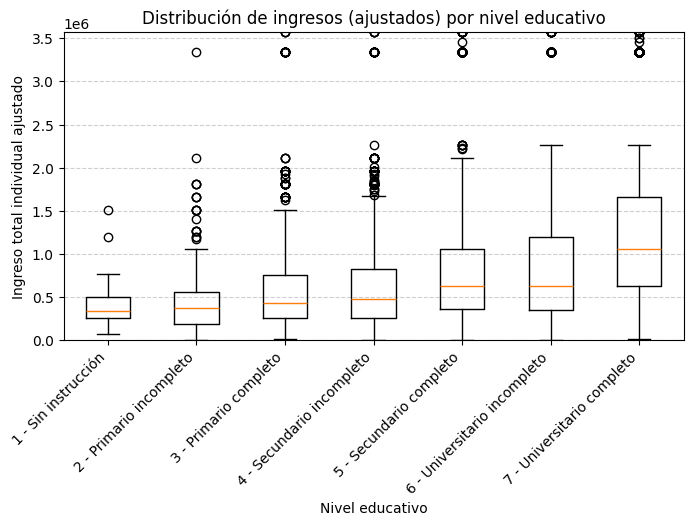

In [ ]:
# Grafico exploratorio sobre la variable P21_ajustada vs la region donde vive le encuestado

# Ordenar niveles educativos por promedio ponderado
niveles_ordenados = prom_por_nivel.sort_values('promedio_ponderado')['NIVEL_ED']

# Crear boxplot ordenado
plt.figure(figsize=(8,4))
plt.boxplot(
    [eph_ingreso.loc[eph_ingreso['NIVEL_ED'] == nivel, 'P21_ajustada']
     for nivel in niveles_ordenados],
    labels=niveles_ordenados,
    showfliers=True
)

plt.title('Distribución de ingresos (ajustados) por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Ingreso total individual ajustado')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, eph_ingreso['P21_ajustada'].quantile(0.95)) # Recorto los valores mas altos (último vigesil del ingreso),
                                                        # a fin de no distorcionar la imagen, pues el boxplot los toma como outliers
plt.show()

Se puede percibir como aumentarán las posibilidades de obtener mayores ingresos, al tener mayores oportunidades de formación

<a id='4._Análisis_econométrico'></a>


## 4. Análisis Econométrico

In [ ]:
import statsmodels.api as sm                # modelos estadísticos
import statsmodels.stats.api as sms         # módulo stats de statsmodels
import matplotlib.pyplot as plt             # gráficos básicos
import seaborn as sns                       # gráficos más avanzados
sns.set_style("white")                      # estilo de gráficos

In [ ]:
eph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46860 entries, 0 to 46859
Columns: 235 entries, CODUSU to P_ADECCF
dtypes: float64(166), int64(59), object(10)
memory usage: 84.0+ MB


In [ ]:
variables = [

"ANO4",          # Año del relevamiento
"REGION",        # Región estadística (NEA, NOA, Cuyo, Pampeana, etc.)
"AGLOMERADO",    # Código del aglomerado urbano
"CH04",          # Sexo (1 = varon, 2 = mujer)
"CH06",          # Edad
"NIVEL_ED",      # Nivel educativo. 1=Primario incompleto; 2=Primario completo; 3=Secundario incompleto; 4=Secundario completo; 5=Superior universitario incompleto; 6=Superior universitario completo; 7=Sin instrucción; 9=Ns/Nr
"ESTADO",        # Condición de actividad: 0=Entrevista individual no realizada;1=Ocupado; 2=Desocupado; 3=Inactivo; 4=Menor de 10 años
"CAT_OCUP",      # Categoría ocupacional; 1=Patrón; 2=Cuenta propia; 3=Obrero o empleado; 4=Trabajador familiar sin remuneración; 9=Ns/Nr.
"EMPLEO",        # Tipo de empleo del ocupado (formal, informal)
"INTENSI",       # Ocupado/subocupado
"P21",           # Monto de ingreso de la ocupación principal
"CH15",          # ¿Dónde nació?
"PP04B_COD",     # ¿A qué se dedica o produce el negocio/empresa/institución? (clasificador)
"DECOCUR",       # N° de decil de ingreso de la ocupación principal del total EPH (ver Anexo I)
"PONDERA",       # Factor de expansión del individuo
"PP3E_TOT",      # Total de horas que trabajó en la semana en la ocupación principal

    ]

eph_estadisticos = eph.copy()

#Filtramos la base por ocupados
eph_estadisticos = eph_estadisticos[eph_estadisticos['ESTADO'] == 1]

#Tomar las variables de la lista variables
eph_estadisticos = eph_estadisticos[variables]

In [ ]:
# renombrar variables
eph_estadisticos = eph_estadisticos.rename(columns={'PP3E_TOT': 'HORAS', 'ANO4':'AÑO', 'CH04': 'SEXO', 'CH06':'EDAD', 'P21':'INGRESO','CH15':'ORIGEN', 'PP04B_COD': 'INDUSTRIA', 'DECOCUR': 'DECIL_INGRESO', 'INTENSI': 'SUBOCUPADO'})

# Modificamos los valores de región
eph_estadisticos["REGION"] = eph_estadisticos["REGION"].astype(str).str.replace("1","Gran Buenos Aires").replace("40", "Noroeste").replace("41", "Noreste").replace("42","Cuyo").replace("43","Pampeana").replace("44","Patagonia")

# convertimos AÑO a entero
eph_estadisticos["AÑO"] = eph_estadisticos["AÑO"].astype(int)

# Modificamos los valores de Origen

eph_estadisticos["ORIGEN"] = eph_estadisticos["ORIGEN"].map({
    1: "1",  # 1 con la nueva clasificación son los nacidos en Argentina
    2: "1",
    3: "1",
    4: "2",   # 2 con la nueva clasificación son los nacidos en un país limítrofe
    5: "3",   # 3 con la nueva clasificación son los nacidos en un país no limítrofe
    9: "9"    # ns/nr
})

# Reemplazamos los códigos de aglomerado por sus nombres

eph_estadisticos["AGLOMERADO"] = eph_estadisticos["AGLOMERADO"].replace({
    2: "Gran La Plata",
    3: "Bahia Blanca",
    4: "Gran Rosario",
    5: "Gran Santa Fé",
    6: "Gran Paraná",
    7: "Posadas",
    8: "Gran Resistencia",
    9: "Comodoro Rivadavia",
    10: "Gran Mendoza",
    12: "Corrientes",
    13: "Gran Córdoba",
    14: "Concordia",
    15: "Formosa",
    17: "Neuquén",
    18: "Santiago del Estero La Banda",
    19: "Jujuy Palpalá",
    20: "Rio Gallegos",
    22: "Gran Catamarca",
    23: "Gran Salta",
    25: "La Rioja",
    26: "Gran San Luis",
    27: "Gran San Juan",
    29: "Gran Tucuman Tafí Viejo",
    30: "Santa Rosa Toay",
    31: "Ushuaia Rio Grande",
    32: "Ciudad Autónoma de Buenos Aires",
    33: "Partidos del Gran Buenos Aires",
    34: "Mar del Plata",
    36: "Rio Cuarto",
    38: "San Nicolás Villa Constitución",
    91: "Rawson Trelew",
    93: "Viedma Carmen de Patagones",
    40: "Resto de Buenos Aires",
    41: "Resto de Catamarca",
    42: "Resto de Córdoba",
    43: "Resto de Corrientes",
    44: "Resto de Chaco",
    45: "Resto de Chubut",
    46: "Resto de Entre Ríos",
    47: "Resto de Formosa",
    48: "Resto de Jujuy",
    49: "Resto de La Pampa",
    50: "Resto de La Rioja",
    51: "Resto de Mendoza",
    52: "Resto de Misiones",
    53: "Resto de Neuquén",
    54: "Resto de Río Negro",
    55: "Resto de Salta",
    56: "Resto de San Juan",
    57: "Resto de San Luis",
    58: "Resto de Santa Cruz",
    60: "Resto de Santa Fe",
    61: "Resto de Santiago del Estero",
    62: "Resto de Tucumán"
})

In [ ]:
# # Diccionario: pasar de aglomerado → provincia en caso de analisis por provincia

# map_aglo_prov = {
#     # Buenos Aires
#     2: "Buenos Aires",   # Gran La Plata
#     3: "Buenos Aires",   # Bahía Blanca
#     32: "Ciudad Autónoma de Buenos Aires",
#     33: "Buenos Aires",   # Partidos del GBA
#     34: "Buenos Aires",   # Mar del Plata
#     38: "Buenos Aires",   # San Nicolás - Villa Constitución (Santa Fe y BsAs, se puede definir como "Buenos Aires" por INDEC)
#     40: "Buenos Aires",   # Resto de Buenos Aires

#     # Catamarca
#     22: "Catamarca",
#     41: "Catamarca",

#     # Chaco
#     8: "Chaco",    # Gran Resistencia
#     44: "Chaco",

#     # Chubut
#     9: "Chubut",    # Comodoro Rivadavia
#     91: "Chubut",   # Rawson - Trelew
#     45: "Chubut",

#     # Córdoba
#     13: "Córdoba",  # Gran Córdoba
#     36: "Córdoba",  # Río Cuarto
#     42: "Córdoba",

#     # Corrientes
#     12: "Corrientes",
#     43: "Corrientes",

#     # Entre Ríos
#     14: "Entre Ríos",   # Concordia
#     46: "Entre Ríos",

#     # Formosa
#     15: "Formosa",
#     47: "Formosa",

#     # Jujuy
#     19: "Jujuy",   # Jujuy - Palpalá
#     48: "Jujuy",

#     # La Pampa
#     30: "La Pampa",  # Santa Rosa - Toay
#     49: "La Pampa",

#     # La Rioja
#     25: "La Rioja",
#     50: "La Rioja",

#     # Mendoza
#     10: "Mendoza",  # Gran Mendoza
#     51: "Mendoza",

#     # Misiones
#     7: "Misiones",  # Posadas
#     52: "Misiones",

#     # Neuquén
#     17: "Neuquén",
#     53: "Neuquén",

#     # Río Negro
#     54: "Río Negro",
#     93: "Río Negro",  # Viedma - Carmen de Patagones (técnicamente RN y BsAs, suele ponerse RN)

#     # Salta
#     23: "Salta",
#     55: "Salta",

#     # San Juan
#     27: "San Juan",
#     56: "San Juan",

#     # San Luis
#     26: "San Luis",
#     57: "San Luis",

#     # Santa Cruz
#     20: "Santa Cruz",  # Río Gallegos
#     58: "Santa Cruz",

#     # Santa Fe
#     4: "Santa Fe",   # Gran Rosario
#     5: "Santa Fe",   # Gran Santa Fe
#     60: "Santa Fe",

#     # Santiago del Estero
#     18: "Santiago del Estero",
#     61: "Santiago del Estero",

#     # Tucumán
#     29: "Tucumán",  # Gran Tucumán - Tafí Viejo
#     62: "Tucumán",

#     # Tierra del Fuego
#     31: "Tierra del Fuego",  # Ushuaia - Río Grande
# }

# # Crear nueva columna PROVINCIA en el DataFrame
# eph_estadisticos["PROVINCIA"] = eph_estadisticos["AGLOMERADO"].replace(map_aglo_prov)

In [ ]:
# Convertimos los valores del campo ingreso a valor numérico, quitando tambien los NaN y quedandonos con los ingresos positivos

eph_estadisticos['INGRESO'] = pd.to_numeric(eph_estadisticos['INGRESO'], errors='coerce')
eph_estadisticos = eph_estadisticos[eph_estadisticos['INGRESO'] > 0]

eph_estadisticos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16449 entries, 3 to 46859
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AÑO            16449 non-null  int64  
 1   REGION         16449 non-null  object 
 2   AGLOMERADO     16449 non-null  object 
 3   SEXO           16449 non-null  int64  
 4   EDAD           16449 non-null  int64  
 5   NIVEL_ED       16449 non-null  int64  
 6   ESTADO         16449 non-null  int64  
 7   CAT_OCUP       16449 non-null  int64  
 8   EMPLEO         16449 non-null  float64
 9   SUBOCUPADO     16449 non-null  float64
 10  INGRESO        16449 non-null  float64
 11  ORIGEN         16449 non-null  object 
 12  INDUSTRIA      16449 non-null  float64
 13  DECIL_INGRESO  16449 non-null  int64  
 14  PONDERA        16449 non-null  int64  
 15  HORAS          16449 non-null  float64
dtypes: float64(5), int64(8), object(3)
memory usage: 2.1+ MB


In [ ]:
# Ajustamos el ingreso según procedimiento previo
# Realizamos una funcion para que ajuste la variable INGRESO de acuerdo a los coeficientes ingresados

# Tabla de coeficientes
coef_df2 = pd.DataFrame({
    "DECIL_INGRESO": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "coef_ajuste2": [1.42, 1.28, 1.25, 1.25, 1.26, 1.29, 1.33, 1.41, 1.51, 2.23]
})

def ajustar_ingreso(df, coef_df, col_ingreso="INGRESO", col_decil="DECIL_INGRESO"):

    """
    Ajusta el ingreso de un DataFrame según coeficientes por decil.

    - df: DataFrame con las columnas de ingreso y decil
    - coef_df: DataFrame con columnas [DECIL_INGRESO, coef_ajuste2]
    - col_ingreso: nombre de la columna de ingreso (default: 'INGRESO')
    - col_decil: nombre de la columna de decil (default: 'DECIL_INGRESO')

   """

    # Guardar ingreso original si no existe
    if f"{col_ingreso}_ORIGINAL" not in df.columns:
        df[f"{col_ingreso}_ORIGINAL"] = df[col_ingreso]

    # Merge con coeficientes
    df = df.merge(coef_df, on=col_decil, how="left")

    # Ajustar a partir del original
    df[col_ingreso] = df[f"{col_ingreso}_ORIGINAL"] * df["coef_ajuste2"]

    # Eliminar columna coeficientes para no duplicar después
    df = df.drop(columns=["coef_ajuste2"])

    return df

eph_estadisticos = ajustar_ingreso(eph_estadisticos, coef_df2)

#Revisamos que la variable ingreso fue debidamente ajustada según su coeficiente
print(eph_estadisticos)


        AÑO             REGION                      AGLOMERADO  SEXO  EDAD  \
0      2024           Noroeste         Gran Tucuman Tafí Viejo     1    30   
1      2024           Noroeste         Gran Tucuman Tafí Viejo     2    30   
2      2024          Patagonia              Ushuaia Rio Grande     1    44   
3      2024          Patagonia              Ushuaia Rio Grande     2    46   
4      2024  Gran Buenos Aires  Partidos del Gran Buenos Aires     1    36   
...     ...                ...                             ...   ...   ...   
16444  2024           Pampeana                       Concordia     2    51   
16445  2024           Pampeana                       Concordia     1    26   
16446  2024           Pampeana                       Concordia     1    49   
16447  2024           Pampeana                       Concordia     2    49   
16448  2024           Noroeste         Gran Tucuman Tafí Viejo     2    39   

       NIVEL_ED  ESTADO  CAT_OCUP  EMPLEO  SUBOCUPADO      INGR

---

Realizamos un análisis del ingreso por deciles y su relación con las otras variables consideradas determinantes, como el nivel educativo.


In [ ]:
# Deciles (10 grupos)
eph_estadisticos["DECIL"] = pd.qcut(
    eph_estadisticos["INGRESO"],
    q=10,                # número de grupos (10 = deciles)
    labels=False         # devuelve números 0..9, si querés etiquetas True
) + 1                   # sumo 1 para que vaya de 1..10

#Tratamos la variable NIVEL_ED

mapa = {
    7: 0,  # sin instrucción
    1: 0,  # primario incompleto -> sin instrucción
    2: 1,  # primario completo
    3: 1,  # secundario incompleto -> al menos primario completo
    4: 2,  # secundario completo
    5: 2,  # universitario incompleto -> al menos secundario completo
    6: 3,  # universitario completo
    9: np.nan  # Ns/Nr
}

eph_estadisticos["NIVEL_ED_RECOD"] = eph_estadisticos["NIVEL_ED"].replace(mapa)


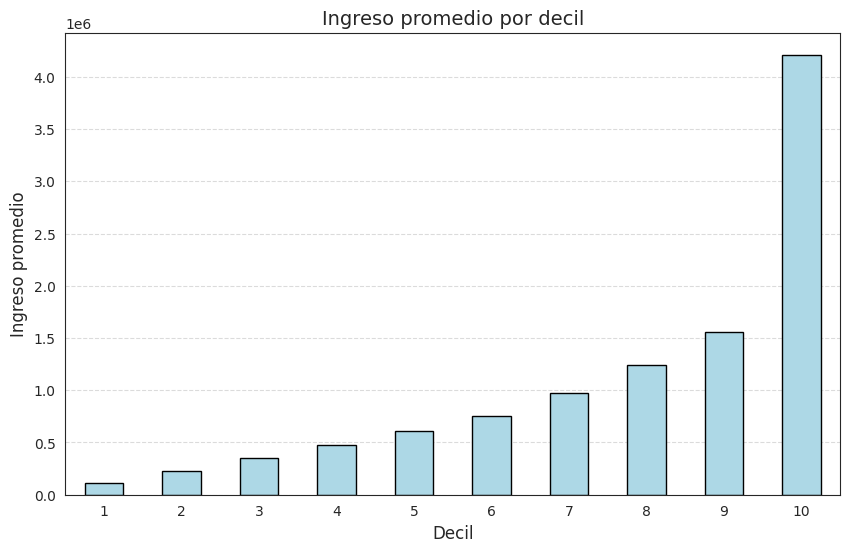

In [ ]:
# Calcular ingreso promedio por decil
ingreso_deciles = eph_estadisticos.groupby("DECIL")["INGRESO"].mean()

# Gráfico de barras
plt.figure(figsize=(10,6))
ingreso_deciles.plot(kind="bar", color="lightblue", edgecolor="black")

plt.title("Ingreso promedio por decil", fontsize=14)
plt.xlabel("Decil", fontsize=12)
plt.ylabel("Ingreso promedio", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

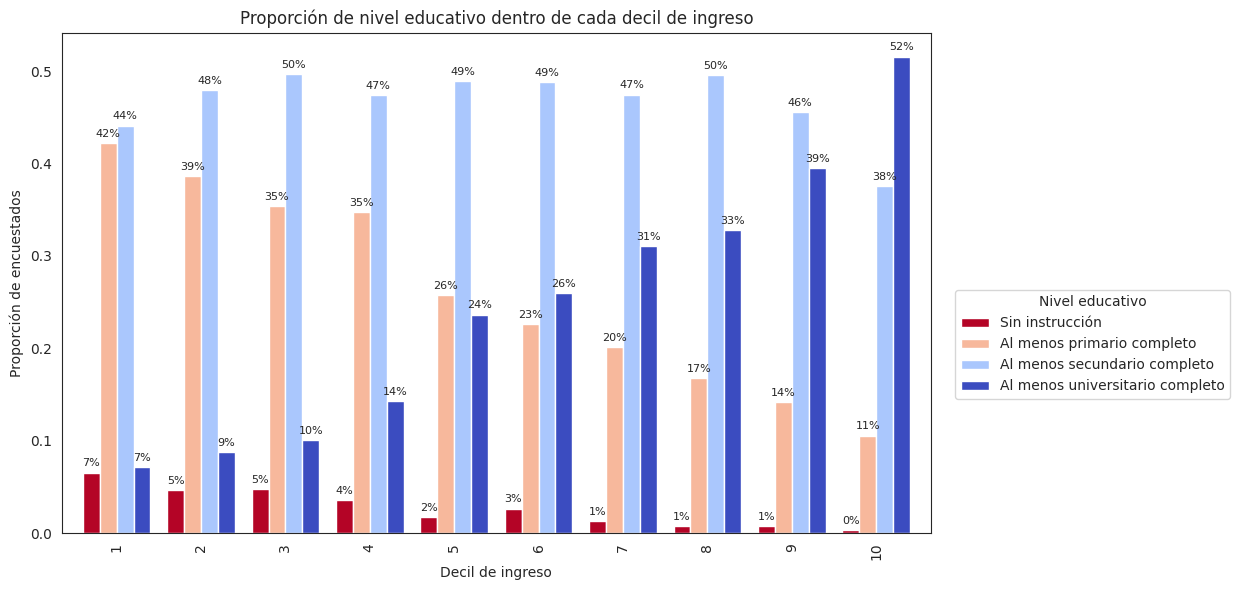

In [ ]:
import matplotlib.cm as cm

# Mapa de etiquetas
label_map = {
    0: "Sin instrucción",
    1: "Al menos primario completo",
    2: "Al menos secundario completo",
    3: "Al menos universitario completo"
}

# Tabla de conteos
tabla = eph_estadisticos.groupby(["DECIL", "NIVEL_ED_RECOD"]).size().reset_index(name="Cantidad")

# Pivot
tabla_pivot = tabla.pivot(index="DECIL", columns="NIVEL_ED_RECOD", values="Cantidad").fillna(0)

# Asegurar orden de columnas
cols = [c for c in [0, 1, 2, 3] if c in tabla_pivot.columns]
tabla_pivot = tabla_pivot[cols]

# Proporciones
tabla_prop = tabla_pivot.div(tabla_pivot.sum(axis=1), axis=0)

# Renombrar columnas
tabla_prop = tabla_prop.rename(columns=label_map)

# Graficar
fig, ax = plt.subplots(figsize=(12, 6))
tabla_prop.plot(
    kind='bar',
    stacked=False,
    width=0.8,
    ax=ax,
    colormap=cm.coolwarm_r
)

ax.set_xlabel('Decil de ingreso')
ax.set_ylabel('Proporción de encuestados')
ax.set_title('Proporción de nivel educativo dentro de cada decil de ingreso')

# Leyenda a la derecha
ax.legend(title='Nivel educativo', bbox_to_anchor=(1.02, 0.5), loc='upper left')

# Poner porcentaje entero encima de cada barra
for p in ax.patches:
    height = p.get_height()
    if height is None or np.isnan(height) or height == 0:
        continue
    ax.annotate(f'{height*100:.0f}%',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8, xytext=(0, 3), textcoords='offset points')

fig.tight_layout()
fig.subplots_adjust(right=0.78)
plt.show()

De este gráfico podemos inferir que el nivel educativo repercute directamente en los niveles de ingresos, observando un impacto importante en aquellos individuos que poseen los estudios de nivel superior. Sobretodo a partir del 5to decil de ingreso se observa un crecimiento en la cantidad de personas con estudios superiores.


* Para deciles de ingresos bajos, predominan las personas con estudios primarios y secundarios
* Para deciles de ingresos medios y altos, predominan las personas con estudios secundarios y superiores universitarios
* Para todos los deciles de ingresos, las personas con estudios secundarios guardan un porcentaje homogéneo




  <a id='4a-GINI_y_Clusterizción_por_Aglomerado'></a>
  ### 4.a GINI y Clusterización por Aglomerado

In [ ]:
# Cálculo de coeficiente de Gini

# Ordenar por ingreso
eph_estadisticos = eph_estadisticos.sort_values("INGRESO")

# Proporción de cada ingreso respecto al total
eph_estadisticos["prop_ingreso"] = eph_estadisticos["INGRESO"] / eph_estadisticos["INGRESO"].sum()

# Proporción acumulada
eph_estadisticos["acum_ingreso"] = eph_estadisticos["prop_ingreso"].cumsum()
eph_estadisticos["acum_poblacion"] = np.arange(1, len(eph_estadisticos)+1) / len(eph_estadisticos)

# Agregar punto inicial (0,0) para la curva de Lorenz
lorenz = np.insert(eph_estadisticos["acum_ingreso"].values, 0, 0)
poblacion = np.insert(eph_estadisticos["acum_poblacion"].values, 0, 0)

# Área bajo la curva
area = np.trapezoid(lorenz, poblacion)

# Coeficiente de Gini
gini = 1 - 2 * area
print("Coeficiente de Gini:", gini)

Coeficiente de Gini: 0.5105607958086953


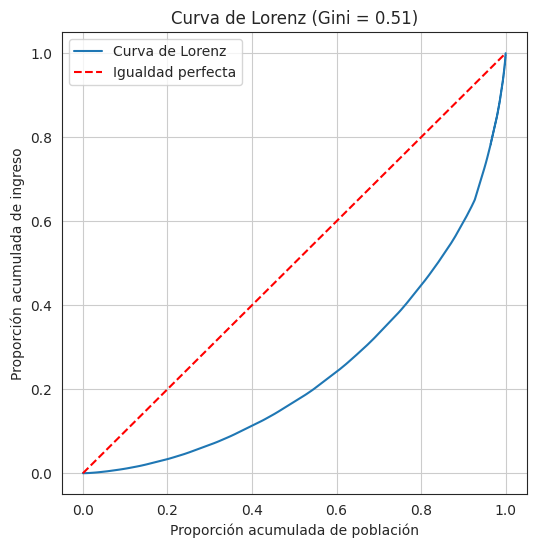

In [ ]:
# Gráfico de la curva de Lorenz

plt.figure(figsize=(6,6))
plt.plot(poblacion, lorenz, drawstyle='steps-post', label="Curva de Lorenz")
plt.plot([0,1], [0,1], color="red", linestyle="--", label="Igualdad perfecta")
plt.xlabel("Proporción acumulada de población")
plt.ylabel("Proporción acumulada de ingreso")
plt.title(f"Curva de Lorenz (Gini = {gini:.2f})")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Función para calcular el coeficiente de Gini
def gini(array):
    array = np.array(array)
    array = array[array >= 0]  # eliminar negativos
    if array.size == 0:
        return np.nan
    array = np.sort(array)
    n = array.size
    cum_income = np.cumsum(array)
    return (2 * np.sum((np.arange(1, n+1) * array)) / (n * np.sum(array))) - (n+1)/n

# Calcular Gini por aglomerado
gini_aglo = eph_estadisticos.groupby("AGLOMERADO")["INGRESO"].apply(gini)

print("Coeficientes de Gini por aglomerado:")
print(gini_aglo)

Coeficientes de Gini por aglomerado:
AGLOMERADO
Bahia Blanca                      0.50
Ciudad Autónoma de Buenos Aires   0.51
Comodoro Rivadavia                0.55
Concordia                         0.43
Corrientes                        0.37
Formosa                           0.37
Gran Catamarca                    0.44
Gran Córdoba                      0.48
Gran La Plata                     0.51
Gran Mendoza                      0.52
Gran Paraná                       0.48
Gran Resistencia                  0.46
Gran Rosario                      0.48
Gran Salta                        0.49
Gran San Juan                     0.53
Gran San Luis                     0.43
Gran Santa Fé                     0.47
Gran Tucuman Tafí Viejo           0.47
Jujuy Palpalá                     0.49
La Rioja                          0.28
Mar del Plata                     0.44
Neuquén                           0.51
Partidos del Gran Buenos Aires    0.52
Posadas                           0.44
Rawson Trelew   

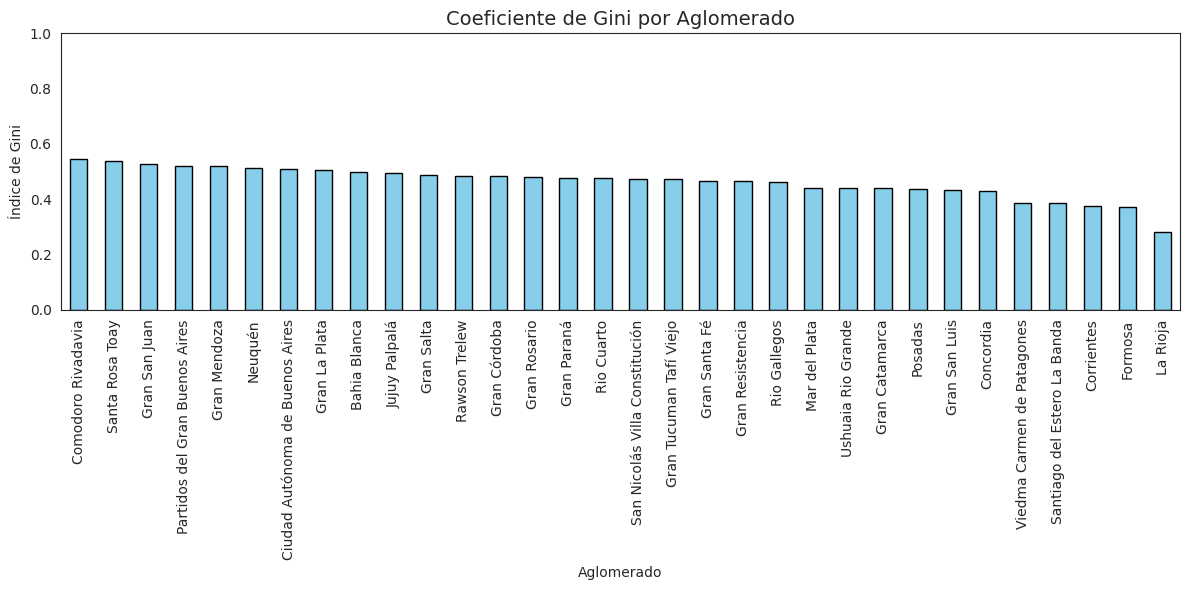

In [ ]:
# Ordenamos los aglomerados por el valor del Gini
gini_sorted = gini_aglo.sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(12,6))
gini_sorted.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Coeficiente de Gini por Aglomerado", fontsize=14)
plt.ylabel("Índice de Gini")
plt.xlabel("Aglomerado")
plt.xticks(rotation=90)
plt.ylim(0,1)  # el índice de Gini siempre está entre 0 y 1
plt.tight_layout()
plt.show()

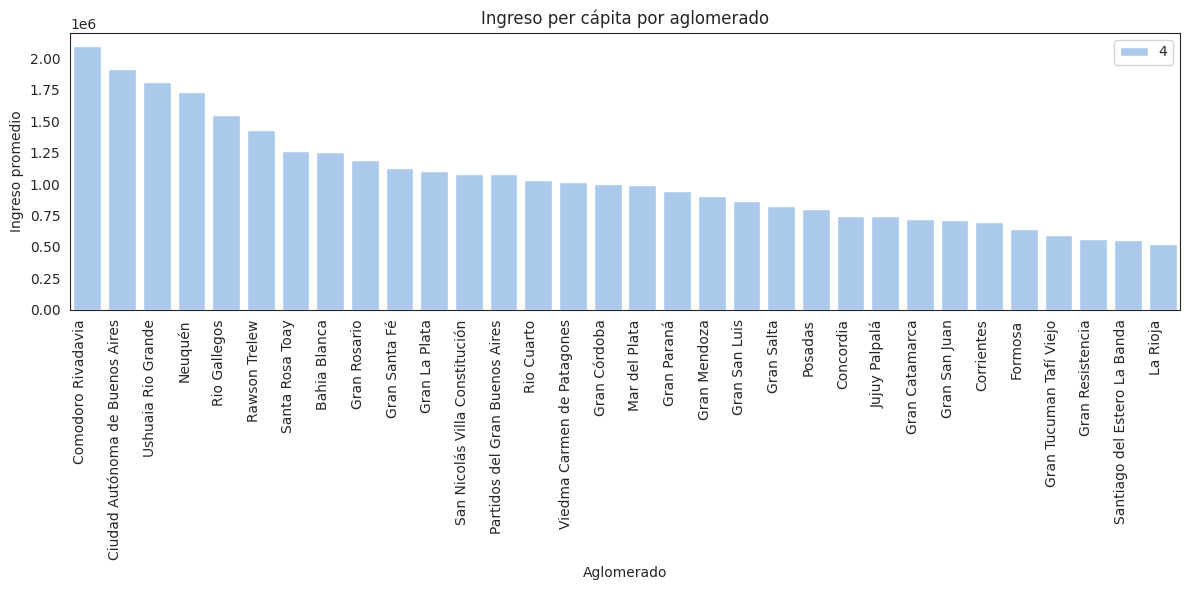

In [ ]:
# Ingreso per cápita por aglomerado
ingreso_capita_aglo = eph_estadisticos.groupby("AGLOMERADO")["INGRESO"].mean()

# Ordenar y resetear índice para seaborn
df_ingreso = ingreso_capita_aglo.sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=df_ingreso, x="AGLOMERADO", y="INGRESO", palette="pastel", hue= 4)

plt.title("Ingreso per cápita por aglomerado")
plt.xlabel("Aglomerado")
plt.ylabel("Ingreso promedio")
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
# Calculamos el logaritmo natural del ingreso per cápita por aglomerado
log_ingreso_capita_aglo = np.log(ingreso_capita_aglo)

Ahora realizaremos una clusterización de los aglomerados según su nivel de ingreso y coeficiente de GINI

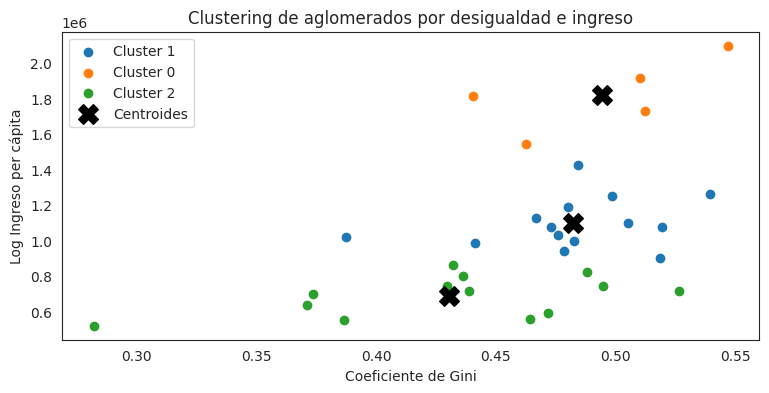

In [ ]:
from sklearn.cluster import KMeans

# Dataset para clustering: Gini + Log ingreso per cápita
clust_data = pd.concat([gini_aglo, ingreso_capita_aglo], axis=1, join="inner")
clust_data.columns = ["gini", "log_ingreso_pc"]

# Definimos cantidad de clusters (ejemplo: 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clust_data["cluster"] = kmeans.fit_predict(clust_data)

# Graficamos clusters
plt.figure(figsize=(9,4))
for c in clust_data["cluster"].unique():
    subset = clust_data[clust_data["cluster"] == c]
    plt.scatter(subset["gini"], subset["log_ingreso_pc"], label=f"Cluster {c}")

# Centros de los clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="black", marker="X", s=200, label="Centroides")

plt.xlabel("Coeficiente de Gini")
plt.ylabel("Log Ingreso per cápita")
plt.title("Clustering de aglomerados por desigualdad e ingreso")
plt.legend()
plt.show()

# Mostrar aglomerados con sus clusters asignados
#print(clust_data.sort_values("cluster"))

En base a esta primera clusterización debemos elegir el número óptimo de Cluster

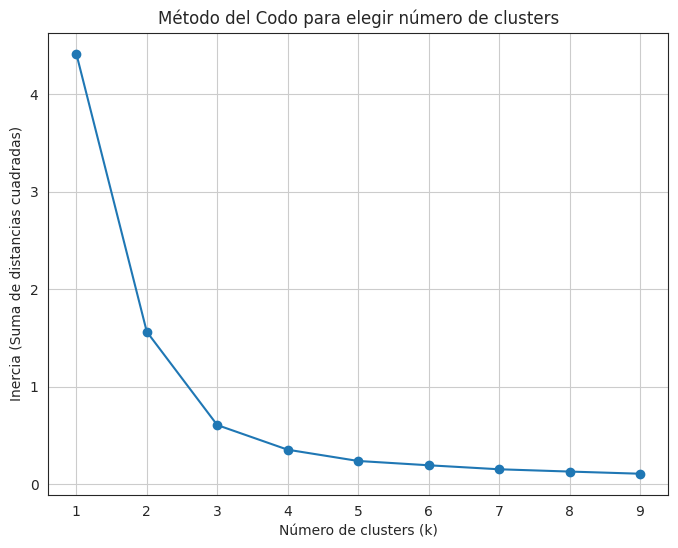

In [ ]:
# Dataset para clustering (gini + log ingreso per cápita)
clust_data = pd.concat([gini_aglo, log_ingreso_capita_aglo], axis=1, join="inner")
clust_data.columns = ["gini", "log_ingreso_capita_aglo"]

# Método del codo: probar distintos valores de k
inertia = []
K_range = range(1, 10)  # probamos de 1 a 9 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clust_data)
    inertia.append(kmeans.inertia_)

# Graficar método del codo
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, marker="o")
plt.title("Método del Codo para elegir número de clusters")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (Suma de distancias cuadradas)")
plt.xticks(K_range)
plt.grid(True)
plt.show()

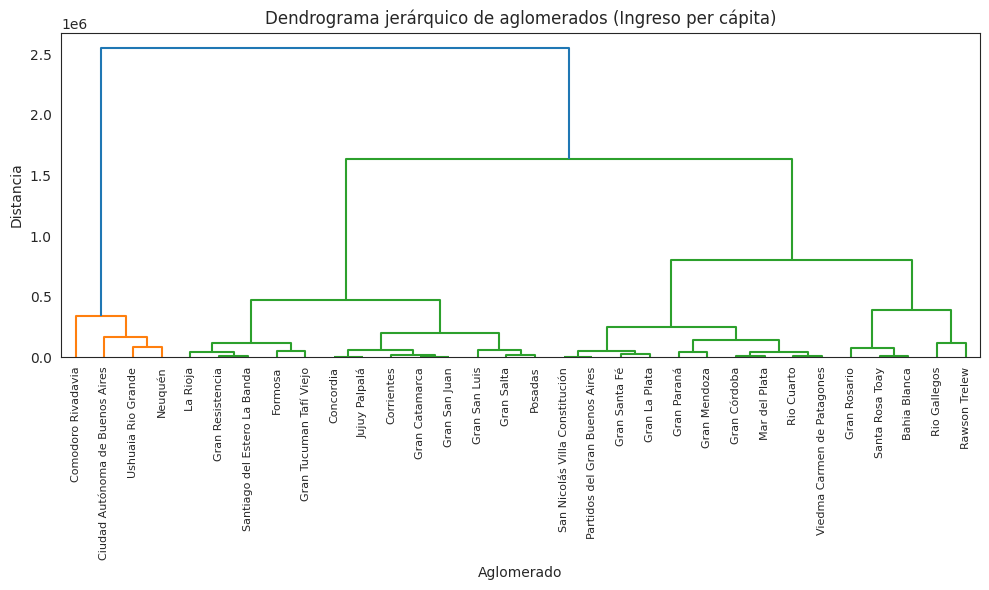

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
#Graficamos el Dendograma
# Tomamos los datos y los preparamos
df_ingreso = ingreso_capita_aglo.sort_values(ascending=False).reset_index()

# Necesitamos una matriz (n_samples, n_features), acá cada aglomerado es un "sample"
X = df_ingreso[["INGRESO"]].values

# Clustering jerárquico con método de enlace (ward = minimiza varianza intra-cluster)
Z = linkage(X, method="ward")

# Graficar dendrograma
plt.figure(figsize=(10,6))
dendrogram(Z, labels=df_ingreso["AGLOMERADO"].values, leaf_rotation=90)

plt.title("Dendrograma jerárquico de aglomerados (Ingreso per cápita)")
plt.xlabel("Aglomerado")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

Revisando los gráficos concluimos que es adecuado elegir 5 clusters y graficamos nuevamente.

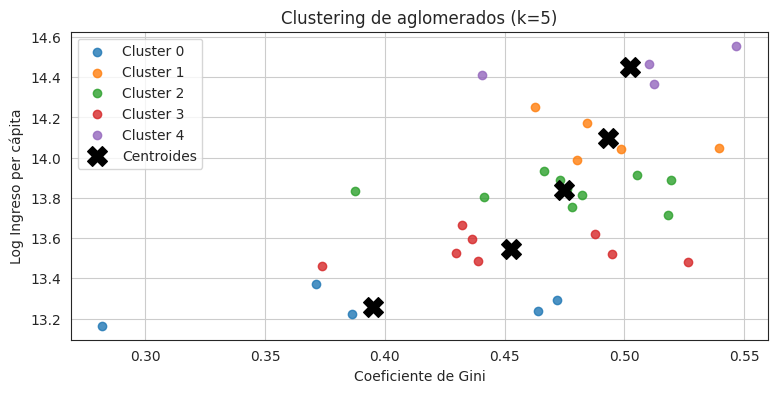

Asignación de aglomerados a clusters:
                                 gini  log_ingreso_capita_aglo  cluster
AGLOMERADO                                                             
Formosa                          0.37                    13.37        0
Gran Resistencia                 0.46                    13.24        0
La Rioja                         0.28                    13.16        0
Gran Tucuman Tafí Viejo          0.47                    13.29        0
Santiago del Estero La Banda     0.39                    13.22        0
Rawson Trelew                    0.48                    14.17        1
Gran Rosario                     0.48                    13.99        1
Bahia Blanca                     0.50                    14.04        1
Santa Rosa Toay                  0.54                    14.05        1
Rio Gallegos                     0.46                    14.25        1
Mar del Plata                    0.44                    13.80        2
Gran Santa Fé             

In [ ]:
# Dataset para clustering (Gini + log ingreso per cápita)
clust_data = pd.concat([gini_aglo, log_ingreso_capita_aglo], axis=1, join="inner")
clust_data.columns = ["gini", "log_ingreso_capita_aglo"]

# Clustering con K=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clust_data["cluster"] = kmeans.fit_predict(clust_data)

# Gráfico de dispersión
plt.figure(figsize=(9,4))
for c in sorted(clust_data["cluster"].unique()):
    subset = clust_data[clust_data["cluster"] == c]
    plt.scatter(subset["gini"], subset["log_ingreso_capita_aglo"], label=f"Cluster {c}", alpha=0.8)

# Centroides
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="black", marker="X", s=200, label="Centroides")

plt.xlabel("Coeficiente de Gini")
plt.ylabel("Log Ingreso per cápita")
plt.title("Clustering de aglomerados (k=5)")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar tabla con clusters asignados
print("Asignación de aglomerados a clusters:")
print(clust_data.sort_values("cluster"))

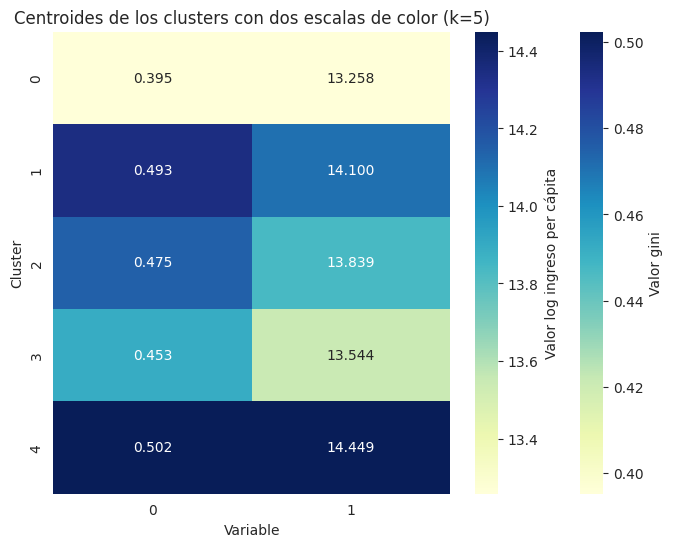

In [ ]:
# Dos colormaps distintos
cmap1 = "YlGnBu"   # para gini
cmap2 = "YlGnBu"     # para log del ingreso per cápita

plt.figure(figsize=(8,6))

# Máscaras: True = ocultar celda
mask_col1 = np.zeros_like(centers, dtype=bool)
mask_col1[:, 1] = True   # oculta la segunda columna

mask_col2 = np.zeros_like(centers, dtype=bool)
mask_col2[:, 0] = True   # oculta la primera columna

# Heatmap columna 1
sns.heatmap(
    centers,
    mask=mask_col1,
    annot=True, fmt=".3f",
    cmap=cmap1,
    cbar_kws={"label": "Valor gini"}
)

# Heatmap columna 2 (superpuesto)
sns.heatmap(
    centers,
    mask=mask_col2,
    annot=True, fmt=".3f",
    cmap=cmap2,
    cbar_kws={"label": "Valor log ingreso per cápita"}
)

plt.title("Centroides de los clusters con dos escalas de color (k=5)")
plt.ylabel("Cluster")
plt.xlabel("Variable")
plt.show()

De este análisis podemos visualizar que para todos los niveles de ingresos aparecen condiciones de desigualdad, indicado por el coeficiente de GINI.

* Podemos decir que en los cluster que reúnen los ingresos per cápita más bajos, encontramos aglomerados con distintos niveles de desigualdades, los cuales promedian el GINI más bajo.
* En los cluster que reúnen los mayores ingresos per cápita la desigualdad es mayor
* Se aprecian como casos extremos a La Rioja, aglomerado que forma parate de los cluster con los ingresos per-cápita más bajos pero en el menor coeficiente de Gini (menor desigualdad), contra Comodoro Rivadavia, como aglomerado que integra los cluster con los ingresos per-cápita más altos, con el mayor coeficiente de Gini, y en conseguencia la de mayor desigualdad.



---



  <a id='4b-Análisis_estadístico_inferenciañ'></a>
  ### 4.b Análisis estadístico inferencial

Analisis de Regresión

Realizaremos un análisis de regresión para encontrar y analizar los determinantes del ingreso y poder comprender las posibles causas de la desigualdad del país. Para ello, utilizamos como variables explicativas, a: Edad, Sexo, categorias de ocupacíon (por cuenta propia y obreros u empleados), origen migratorio de la persona, Regiones del país y niveles de educación.

In [ ]:
# Variable dependiente
y = eph_estadisticos["INGRESO"]

#Normalizar el ingreso con el log
y = np.log(eph_estadisticos["INGRESO"]) # + 1)  # +1 para evitar log(0)    ----> quitaría el +1, porque ya filtraste arriba que sea mayor que 0

# Variables explicativas originales
X =  eph_estadisticos[["EDAD", "SEXO", "NIVEL_ED", "CAT_OCUP","REGION", "ORIGEN"]]

# Create dummies (with reference) and convert to integer
X = pd.get_dummies(X, columns=["NIVEL_ED", "CAT_OCUP","REGION", "ORIGEN"], drop_first=True).astype(int)

# Aseguramos variable sexo como dummy
X = pd.get_dummies(X, columns=["SEXO"], drop_first=True).astype(int)

# Aseguramos todas variables numericas
X = X.apply(pd.to_numeric, errors='coerce')

# Eliminamos posbles NaN
X = X.dropna()
y = y.loc[X.index]

# Agregamos constante
X = sm.add_constant(X)


In [ ]:
# OLS Model
modelo = sm.OLS(y, X)
resultado = modelo.fit()

print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                INGRESO   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     436.1
Date:                Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                        00:59:34   Log-Likelihood:                -20056.
No. Observations:               16449   AIC:                         4.015e+04
Df Residuals:                   16430   BIC:                         4.030e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Interpretación del modelo**

* R² = 0.323 lo que significa que el modelo explica un 32% de la variabilidad del ingreso. Este valor es bueno y aceptable para este tipo de datos, pero debemos prestar atención a los posibles problemas de multicolinealidad y heterocedasticidad que pueda mostrar el modelo

* El F-test es significativo F-test p<0.001.

**Interpretación de las variables**

Los mayores predictores del ingreso son:

* Educación (claramente ascendente hasta nivel terciario/universitario).

* Condición de la Ocupación (un cuentapropista, CAT_OCUP = 2 recibirá un ingreso significativamente menor que un Patrón o Empleado/obrero)

* Región (Patagonia y GBA/Pampeana se reciben mayores ingresos. Una persona que vive en la región NOA, percibirá un impacto negativo en sus ingresos por este hecho).

* Sexo (se observa que existe una brecha salarial entre sexo femenino y masculino, siendo el ingreso de las mujeres afectado en forma negativa).

Efectos leves sobre el ingreso:

* La edad aporta de forma positiva pero modesta.

* El origen migratorio influye en algunos casos (efecto negativo en  personas originarias de países limitrofes).

---



#### Análisis de la Multicolinealidad

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                    Variable   VIF
0                      const 96.71
1                       EDAD  1.11
2                 NIVEL_ED_2  4.46
3                 NIVEL_ED_3  6.07
4                 NIVEL_ED_4  9.11
5                 NIVEL_ED_5  5.77
6                 NIVEL_ED_6  7.83
7                 NIVEL_ED_7  1.05
8                 CAT_OCUP_2  6.36
9                 CAT_OCUP_3  6.42
10               REGION_Cuyo  1.88
11  REGION_Gran Buenos Aires  2.27
12           REGION_Noroeste  2.72
13           REGION_Pampeana  2.82
14          REGION_Patagonia  2.04
15                  ORIGEN_2  1.03
16                  ORIGEN_3  1.02
17                  ORIGEN_9  1.00
18                    SEXO_2  1.05


Probamos para esta regresión si se presentan problemas de multicolinealidad a través del factor inflacionario de la varianza.

Como dicho VIF es para cada una de las variables explicativas, excepto la constante, menor a 10, entonces decimos que no hay problemas graves de multicolinealidad.

Para confirmar esto último, se verifica el número de condición de la matriz.


In [ ]:
# Calcular el número de condición de la matriz de diseño X

condition_number = np.linalg.cond(X)

print(f"Número de condición: {condition_number:.2f}")

Número de condición: 2773.03


Sin embargo, dado que el número de condición es mayor a 30 (2773), debemos aplicar técnicas para solucionar la multicolinealidad de las variables. Realizaremos un análisis de componentes principales.

In [ ]:
# Se divide a la matriz de variables "X" en vectores ortogonales, sin correlación entre estas

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca_1 = PCA().fit(X)

In [ ]:
from tabulate import tabulate

# Calculamos la varianza total de cada componente principal
np.set_printoptions(precision=2, suppress=True)
print(pca_1.explained_variance_)
print('\n')

#Porcentaje de la varianza de cada componente
varianza_explicada1 = pca_1.explained_variance_ratio_

np.set_printoptions(precision=3, suppress=True)
print('Porcentaje de acumulación de la información por componente')
for i, var in enumerate(varianza_explicada1, start=1):
    print(f"Componente {i}: {var*100:.2f}%")

[164.82   0.35   0.29   0.26   0.25   0.19   0.18   0.15   0.13   0.11
   0.11   0.02   0.02   0.01   0.01   0.01   0.     0.     0.  ]


Porcentaje de acumulación de la información por componente
Componente 1: 98.74%
Componente 2: 0.21%
Componente 3: 0.17%
Componente 4: 0.16%
Componente 5: 0.15%
Componente 6: 0.12%
Componente 7: 0.11%
Componente 8: 0.09%
Componente 9: 0.08%
Componente 10: 0.07%
Componente 11: 0.06%
Componente 12: 0.01%
Componente 13: 0.01%
Componente 14: 0.01%
Componente 15: 0.01%
Componente 16: 0.00%
Componente 17: 0.00%
Componente 18: 0.00%
Componente 19: 0.00%


La primera componente concentra el 98,74% de la información, por ello será importante normalizar

In [ ]:
#INICIAMOS EL PROCESO DE NORMALIZACIÓN de la matriz X
z_scaler = StandardScaler()
X_z = z_scaler.fit_transform(X)

# Generamos una nueva matriz de componentes principales estandarizados
pca = PCA().fit(X_z)

In [ ]:
# Varianza de cada componente (valores propios)

for i, var in enumerate(pca.explained_variance_, start=1):
    print(f"Componente {i}: {var:.2f}")

Componente 1: 2.01
Componente 2: 1.54
Componente 3: 1.35
Componente 4: 1.33
Componente 5: 1.31
Componente 6: 1.28
Componente 7: 1.20
Componente 8: 1.14
Componente 9: 1.12
Componente 10: 1.01
Componente 11: 1.00
Componente 12: 0.98
Componente 13: 0.88
Componente 14: 0.86
Componente 15: 0.78
Componente 16: 0.12
Componente 17: 0.08
Componente 18: 0.03
Componente 19: 0.00


Aplicando el criterio de los componentes principales, deberíamos elegir las primeras 12 componentes, ya que son mayores a 1.
Esto significa que la primera explica 2.012 más que la primera variable y la segunda componente explica 1.536 más que la segunda variable.

Esto lo podemos observar en orden decreciente hasta la componente número 12.

In [ ]:
#Porcentaje de la varianza de cada componente

varianza_explicada = pca.explained_variance_ratio_

# Calcular acumulado
varianza_acumulada = varianza_explicada.cumsum()

print("Varianza explicada por componente:")
for i, var in enumerate(varianza_explicada, start=1):
    print(f"Componente {i}: {var*100:.2f}%")

print("\nVarianza acumulada:")
for i, var in enumerate(varianza_acumulada, start=1):
    print(f"Componente {i}: {var*100:.2f}%")

Varianza explicada por componente:
Componente 1: 11.18%
Componente 2: 8.54%
Componente 3: 7.49%
Componente 4: 7.38%
Componente 5: 7.26%
Componente 6: 7.11%
Componente 7: 6.65%
Componente 8: 6.31%
Componente 9: 6.25%
Componente 10: 5.60%
Componente 11: 5.54%
Componente 12: 5.42%
Componente 13: 4.89%
Componente 14: 4.76%
Componente 15: 4.33%
Componente 16: 0.66%
Componente 17: 0.45%
Componente 18: 0.19%
Componente 19: 0.00%

Varianza acumulada:
Componente 1: 11.18%
Componente 2: 19.71%
Componente 3: 27.20%
Componente 4: 34.58%
Componente 5: 41.84%
Componente 6: 48.95%
Componente 7: 55.60%
Componente 8: 61.92%
Componente 9: 68.17%
Componente 10: 73.77%
Componente 11: 79.31%
Componente 12: 84.73%
Componente 13: 89.61%
Componente 14: 94.37%
Componente 15: 98.70%
Componente 16: 99.36%
Componente 17: 99.81%
Componente 18: 100.00%
Componente 19: 100.00%


La primera componente, explica un 11%, la segunda el 8%. SI sumamos hasta la decimosegunda componente, acumulamos 84% de la información.

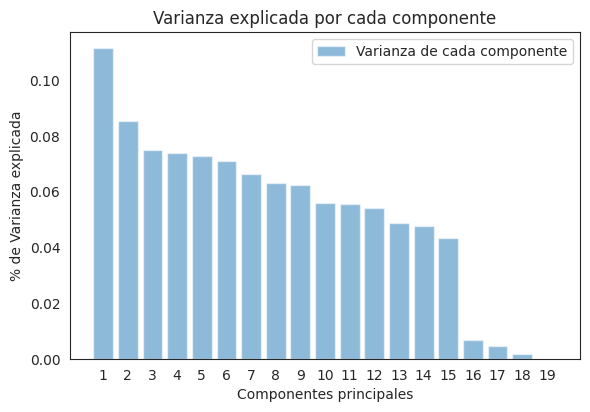

In [ ]:
#Graficamos la situación observada

plt.figure(figsize=(6, 4))
plt.bar(range(19), varianza_explicada, alpha=0.5, align='center', label='Varianza de cada componente')
plt.ylabel('% de Varianza explicada')
plt.xlabel('Componentes principales')
plt.xticks(range(19), range(1, 20))
plt.legend(loc='best')
plt.tight_layout()
plt.title('Varianza explicada por cada componente')
plt.show()

Según este gráfico el salto se produce con la decimoquinta componente. Es decir, se debería incluir hasta 15 componentes. Sin embargo, de acuerdo a lo que la teoría indica, podemos elegir componentes hasta acumular el 80% de la variabilidad explicada.

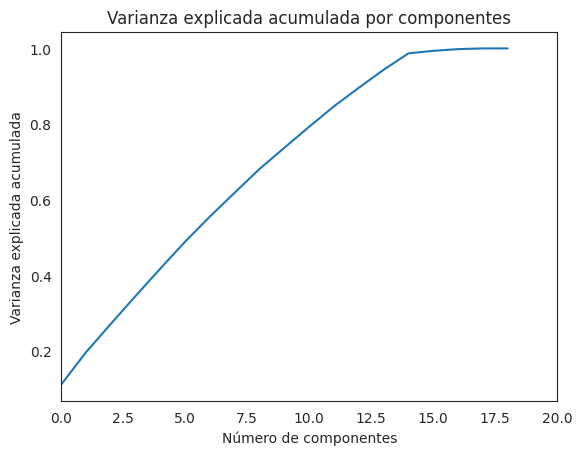

In [ ]:
# Variabilidad Acumulada

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,20)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por componentes')
plt.show()

Podemos observar el 80% de la variabilidad explicada se acumula en la componente numero 11

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# 1. Quitamos la constante
X_no_const = X.drop(columns=["const"])

# 2. Estandarizamos X → Z (media 0, varianza 1)
scaler = StandardScaler()
Xz = scaler.fit_transform(X_no_const)

# 3. Ajustamos PCA (con el mismo número de componentes que variables)
pca = PCA(n_components=X_no_const.shape[1])
pca.fit(Xz)

# 4. Matriz de cargas factoriales (componentes x variables)
#    Cada fila = componente principal
#    Cada columna = variable original estandarizada
loadings = pd.DataFrame(
    pca.components_,
    columns=X_no_const.columns,
    index=[f"PC{i+1}" for i in range(X_no_const.shape[1])]
)

print("Matriz de correlaciones entre Xz y los Componentes Principales:")
loadings

Matriz de correlaciones entre Xz y los Componentes Principales:


,EDAD,NIVEL_ED_2,NIVEL_ED_3,NIVEL_ED_4,NIVEL_ED_5,NIVEL_ED_6,NIVEL_ED_7,CAT_OCUP_2,CAT_OCUP_3,REGION_Cuyo,REGION_Gran Buenos Aires,REGION_Noroeste,REGION_Pampeana,REGION_Patagonia,ORIGEN_2,ORIGEN_3,ORIGEN_9,SEXO_2
PC1,-0.20,-0.15,-0.07,0.03,0.03,0.12,-0.03,-0.66,0.67,-0.04,-0.01,-0.03,0.02,0.07,-0.08,0.02,-0.00,0.10
PC2,0.31,0.12,-0.11,-0.55,0.03,0.58,0.01,0.00,-0.01,-0.00,0.23,-0.23,0.14,-0.13,0.06,0.18,-0.00,0.23
PC3,-0.18,-0.17,0.17,-0.05,0.16,-0.11,-0.04,0.06,-0.05,-0.01,-0.27,-0.42,0.75,-0.15,-0.17,-0.04,0.01,-0.04
PC4,-0.12,0.02,0.29,-0.48,0.33,-0.00,0.01,-0.02,0.02,0.08,-0.29,0.53,-0.11,-0.28,-0.25,-0.17,-0.02,0.02
PC5,0.20,0.41,0.47,-0.29,-0.28,-0.17,0.00,-0.15,0.15,0.16,-0.13,-0.22,-0.01,0.29,0.19,-0.18,0.01,-0.31
PC6,-0.29,-0.30,0.36,-0.19,0.37,-0.19,-0.01,0.04,-0.04,0.10,0.50,-0.28,-0.27,0.09,0.10,0.21,0.01,-0.06
PC7,0.11,0.47,-0.33,-0.07,0.51,-0.41,0.06,-0.09,0.09,-0.32,0.16,0.02,0.15,-0.07,0.22,-0.02,-0.05,-0.05
PC8,0.01,0.12,-0.35,0.02,0.30,-0.05,-0.12,0.01,-0.01,0.72,-0.22,-0.25,-0.18,0.14,-0.08,-0.14,0.10,0.19
PC9,-0.06,-0.19,-0.01,-0.14,0.21,0.13,-0.07,0.10,-0.10,-0.36,-0.32,0.02,-0.03,0.70,0.18,-0.14,-0.11,0.26
PC10,0.04,-0.17,0.05,0.02,0.01,-0.02,0.69,-0.02,0.02,0.03,0.03,-0.01,0.03,-0.08,0.28,-0.34,0.50,0.21


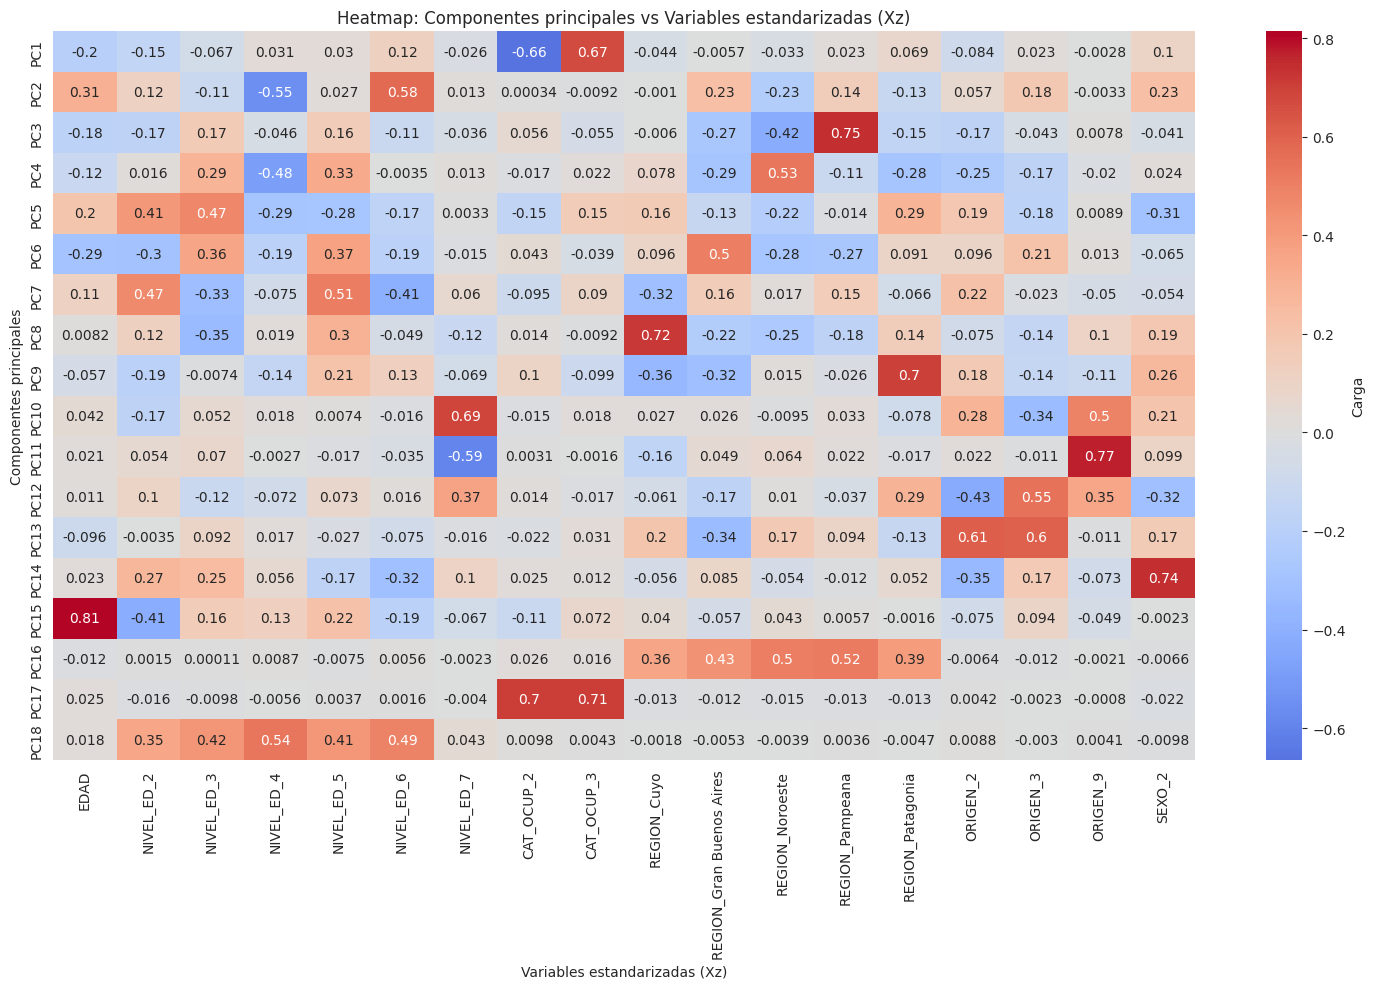

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0,
            cbar_kws={'label': 'Carga'})
plt.title("Heatmap: Componentes principales vs Variables estandarizadas (Xz)")
plt.xlabel("Variables estandarizadas (Xz)")
plt.ylabel("Componentes principales")
plt.tight_layout()
plt.show()

Análisis de los resultados de componentes principales
* PC1

Fuerte correlación: CAT_OCUP_2 (-0.66) vs. CAT_OCUP_3 (0.67).

Interpreta la condición ocupacional: opone a quienes están en CAT_OCUP_2 contra CAT_OCUP_3.

* PC2

Variables educativas: NIVEL_ED_4 (-0.55) vs. NIVEL_ED_6 (0.58).

También edad (0.31) y SEXO_2 (0.23).

Interpreta un gradiente educativo, con algo de efecto por edad y género.

* PC3

Fuerte en regiones: Pampeana (0.75) vs. Noroeste (-0.42) y Gran Bs As (-0.27).

Oposición Pampeana contra NOA / GBA.

* PC4

Cargas mixtas en educación y región: NIVEL_ED_4 (-0.48), NIVEL_ED_5 (0.33), REGIÓN Noroeste (0.53).

Dimensión que mezcla nivel educativo medio y ubicación en NOA.

* PC5

Educación: NIVEL_ED_2 (0.41), NIVEL_ED_3 (0.47), NIVEL_ED_4 (-0.29).

También SEXO_2 (-0.31).

Captura diferencias por nivel educativo bajo-medio y género.

* PC6

Educación alta: NIVEL_ED_3 (0.36), NIVEL_ED_5 (0.37).

Región GBA (0.50) en oposición a Noroeste (-0.28).

Dimensión educación + GBA vs. NOA.

* PC7

Educación: NIVEL_ED_2 (0.47), NIVEL_ED_5 (0.51), NIVEL_ED_6 (-0.41).

Oposición entre secundario bajo y medio vs. superior.

* PC8

Región: Cuyo (0.72) y algo de SEXO_2 (0.19).

Claramente un componente regional (Cuyo).

* PC9

Región: Patagonia (0.70), en oposición a Cuyo (-0.36) y GBA (-0.32).

Componente Patagonia vs. Cuyo/GBA.

* PC10

Origen: ORIGEN_3 (-0.34), ORIGEN_9 (0.50), ORIGEN_2 (0.28).

Dimensión migratoria/origen.

* PC11

Origen: ORIGEN_9 (0.77) en oposición a NIVEL_ED_7 (-0.59).

Mezcla de origen migratorio con un nivel educativo alto.


Resumiendo:

PC1 → Diferencias en categoría ocupacional (muy fuerte).

PC2 → Nivel educativo (medio-bajo vs. alto), con algo de edad y género.

PC3 → Diferencias regionales (Pampeana vs. NOA/GBA).

PC4 → Nivel educativo + NOA.

PC5 → Educación baja-media y género.

PC6 → Educación + GBA vs. NOA.

PC7 → Otro eje de niveles educativos (medio vs. superior).

PC8 → Región Cuyo.

PC9 → Región Patagonia vs. Cuyo/GBA.

PC10 → Origen migratorio.

PC11 → Origen migratorio fuerte (ORIGEN_9).

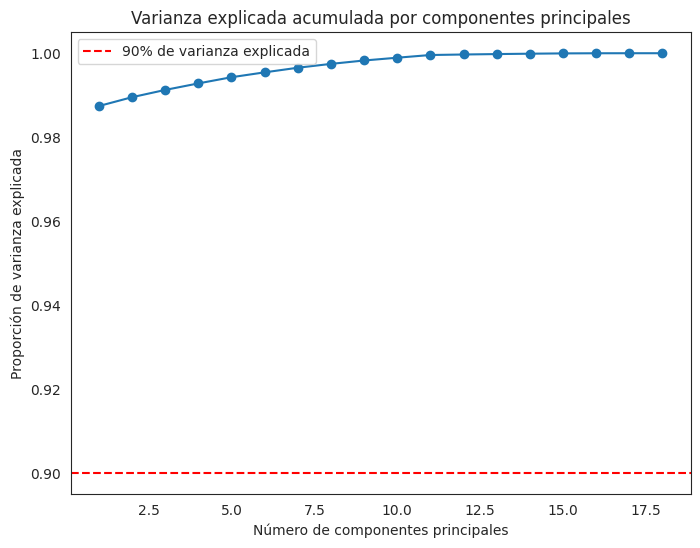

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Quitamos la constante antes del PCA
X_no_const = X.drop(columns=["const"])

# Ajustamos PCA sin fijar número de componentes
pca = PCA().fit(X_no_const)

# Varianza explicada acumulada
var_exp_acum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,6))
plt.plot(range(1, len(var_exp_acum)+1), var_exp_acum, marker="o")
plt.axhline(0.90, color="red", linestyle="--", label="90% de varianza explicada")
plt.title("Varianza explicada acumulada por componentes principales")
plt.xlabel("Número de componentes principales")
plt.ylabel("Proporción de varianza explicada")
plt.legend()
plt.show()


Luego, realizamos la gráfica de varianza explicada acumulada por componentes principales, para decidir sobre la cantidad de componente principales a adoptar. **Elegiremos 11 componentes principales, ya que apartir de 11 comoponentes, la curva se estabiliza.**

In [ ]:
# Estimamos una nueva regresión, a partir de la seleccion de los 11 componentes principales

# 1. Estandarizamos X
scaler = StandardScaler()
Xz = scaler.fit_transform(X_no_const)

# 2. PCA con 11 componentes
pca = PCA(n_components=11)
X_pca = pca.fit_transform(Xz)

# 3. Convertimos a DataFrame y agregamos constante
X_pca = pd.DataFrame(X_pca, index=X.index, columns=[f"PC{i+1}" for i in range(11)])
X_pca = sm.add_constant(X_pca)

# 4. Ajustamos la regresión con los 11 componentes principales
modelo_pcr = sm.OLS(y, X_pca).fit()

print(modelo_pcr.summary())


                            OLS Regression Results                            
Dep. Variable:                INGRESO   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     259.3
Date:                Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                        01:02:00   Log-Likelihood:                -21952.
No. Observations:               16449   AIC:                         4.393e+04
Df Residuals:                   16437   BIC:                         4.402e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3361      0.007   1860.380      0.0

A partir de este análisis podemos observar:

* El ingreso tiene una relación positiva con el Componente principal 1, que reune con mayor peso relativo en su explicación a las categorías ocupacionales trabajadores por cuenta propia (2), Obreros o empleados (3) y Edad. Parecería que ambas categorías tienen el mismo peso relativo (67%) a la hora de mejorar los ingresos y de solo un 20% la edad. Las tres en conjunto, explican en un 15% la mejora en un 1% en los ingresos totales.


Ya habiendo solucionado el conflicto de multicolinealidad de las variables, pasamos a comprobar el supuesto de normalidad en la distribución de los errores.

#### Análisis de la Normalidad

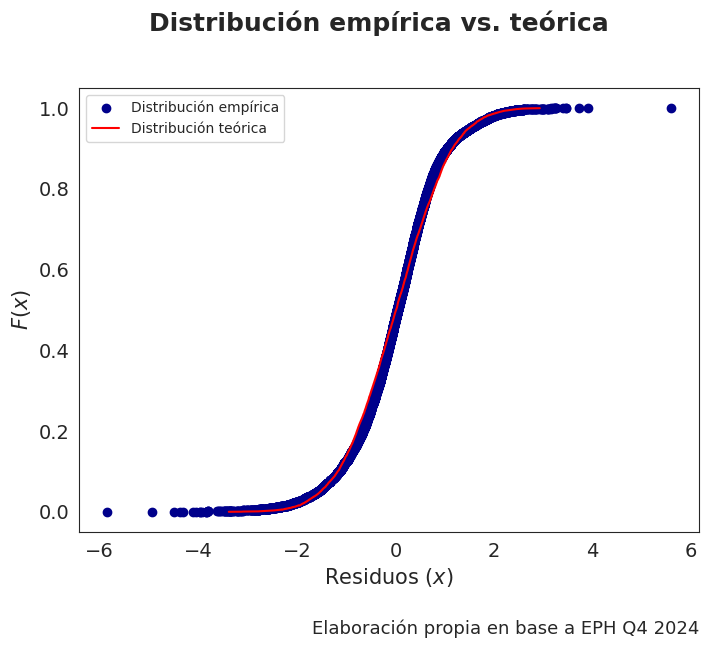

In [ ]:
# Tomamos para este análisis la última regresión realizada, con el análisis de las componentes principales

# Distribución observada de nuestros residuos
residuos = modelo_pcr.resid
x = np.sort(residuos)              # ordenamos los residuos
n = x.size                         # tamaño total de la muestra
y = np.arange(1, n+1) / n          # calculamos las probabilidades acumuladas por cada valor observado en orden
                                   # creando un rango de valores desde 1 a n+1, todos divididos por n

# Luego obtenemos la función de distribución teórica de una normal
Residuos_teoricos = np.random.normal(loc = np.mean(residuos),   # obtenemos una muestra aleatoria proveniente de una
                    scale = np.std(residuos), size = 10000)     # distribución normal con la media y desv.est. de nuestros residuos
x_teor = np.sort(Residuos_teoricos)       # ordenamos la muestra aleatoria
n_teor = x_teor.size                      # guardamos el tamaño de esta muestra
y_teor = np.arange(1, n_teor+1) / n_teor  # calculamos las probabilidades acumuladas por sus valores

# Por último, superponemos ambas distribuciones en un mismo gráfico
fig, ax = plt.subplots(figsize = (8,6))
fig.suptitle("Distribución empírica vs. teórica", fontsize = 18, fontweight = "bold")
ax.scatter(x, y, color = "darkblue", label = "Distribución empírica")   # diagrama de dispersión para la distribución empírica
ax.plot(x_teor, y_teor, color = "red", label = "Distribución teórica")  # una línea curva para la distribución teórica
ax.set_xlabel("Residuos ($x$)", fontsize = 15)
ax.set_ylabel("$F(x)$", fontsize = 15)
ax.tick_params(labelsize = 14)
ax.legend()                       # agregamos una leyenda para tener las referencias del gráfico
fig.text(.9,-.06, "Elaboración propia en base a EPH Q4 2024", fontsize = 13, fontweight = "light", ha = "right")
plt.subplots_adjust(top = 0.85)
plt.show()

La distribución pareciera asemejarse a la normal

/usr/local/lib/python3.12/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


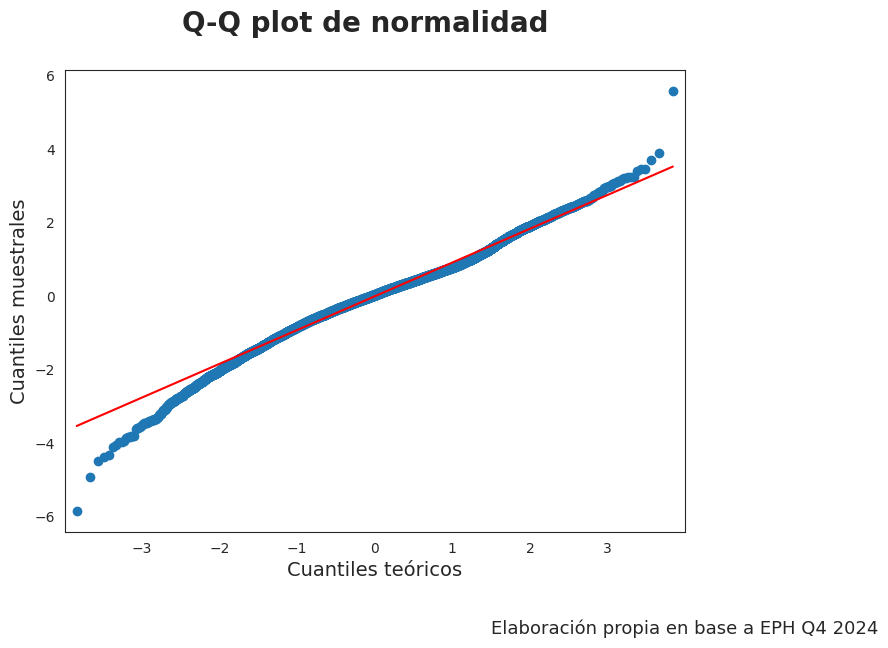

In [ ]:
# Q-Q Plot
fig, ax = plt.subplots(figsize = (8,6))
fig.suptitle("Q-Q plot de normalidad", size = 20, fontweight = "bold")
sm.qqplot(residuos, ax = ax, line = "s", color = "darkblue")
ax.set_xlabel("Cuantiles teóricos", fontsize = 14)
ax.set_ylabel("Cuantiles muestrales", fontsize = 14)
fig.text(.9,-.06, "Elaboración propia en base a EPH Q4 2024", fontsize = 13, fontweight = "light", ha = "center")
plt.show()

Los puntos no se alejarían significativamente del teórico

In [ ]:
# Test Shapiro Wilks para probar normalidad
# Bajo Hipotesis alternativa, la distibución de los errores es normal

import scipy.stats as stats
ResultadosTestSW = stats.shapiro(residuos)
Nombres = ["Estadístico SW", "p-value"]
pd.Series(ResultadosTestSW, index = Nombres)

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16449.
  res = hypotest_fun_out(*samples, **kwds)


,0
Estadístico SW,0.99
p-value,0.00


El P-value de la prueba confirma que los errores se distribuyen de forma normal

#### Análisis de la Heteroscedasticidad

In [ ]:
# Test de Goldfeld-Quandt

import statsmodels.api as sm
import statsmodels.stats.diagnostic as st

# Ajustar el modelo OLS
modelo = sm.OLS(y, X_pca).fit()

# alternative = Si escribo "increasing" supone que la varianza del error crece con el valor de ordenamiento
# Si lo cambiamos a "decreasing" se puede sospechár lo contrario.
# Elegiremos la alternativa two-sided para buscar heterocedasticidad tanto cuando la varianza del error ser ordena de forma creciente como decreciente

gq_test = st.het_goldfeldquandt(y, X_pca, alternative="two-sided")

F_stat, p_val, _ = gq_test

print("Goldfeld–Quandt Test")
print("--------------------")
print(f"F statistic: {F_stat:.4f}")
print(f"p-value:     {p_val:.4f}")

# two-sided busca heteroscedasticidad en cualquier direccion.
  # H0: Varianza homocedastica
  # H1: Heteroscedasticidad


Goldfeld–Quandt Test
--------------------
F statistic: 0.9552
p-value:     0.0380


Esta prueba no pareciera indicar evidencia de Heteroscedasticidad, dado que no se rechaza la Hipótesis nula.

* Hipótesis nula (H₀): la varianza de los errores es constante (homocedasticidad).
* Hipótesis alternativa (H₁): la varianza de los errores depende de alguna variable explicativa

In [ ]:
# Test de White

# Ajustamos el modelo OLS
modelo = sm.OLS(y, X_pca).fit()

white_test = st.het_white(modelo.resid, modelo.model.exog)

lm_stat, lm_pval, f_stat, f_pval = white_test

print("Test de White")
print("-------------")
print(f"LM Statistic : {lm_stat:.4f}")
print(f"LM p-value   : {lm_pval:.4f}")
print(f"F Statistic  : {f_stat:.4f}")
print(f"F p-value    : {f_pval:.4f}")

# Test de Breusch-Pagan
bp_test = st.het_breuschpagan(modelo.resid, modelo.model.exog)

lm_stat, lm_pval, f_stat, f_pval = bp_test

print('\n')
print("Test de Breusch-Pagan")
print("----------------------")
print(f"LM Statistic : {lm_stat:.4f}")
print(f"LM p-value   : {lm_pval:.4f}")
print(f"F Statistic  : {f_stat:.4f}")
print(f"F p-value    : {f_pval:.4f}")

Test de White
-------------
LM Statistic : 2505.9720
LM p-value   : 0.0000
F Statistic  : 38.2123
F p-value    : 0.0000


Test de Breusch-Pagan
----------------------
LM Statistic : 1519.2003
LM p-value   : 0.0000
F Statistic  : 152.0516
F p-value    : 0.0000


Los P-value que se obtienen con el Test de White y el test de Breusch-Pagan, confirman la presencia de heterocedasticidad (En ambos casos, los p-valores son menores a 0.05, por lo que se rechaza H₀). Para solucionar esto tenemos que hacer más robusto el modelo.

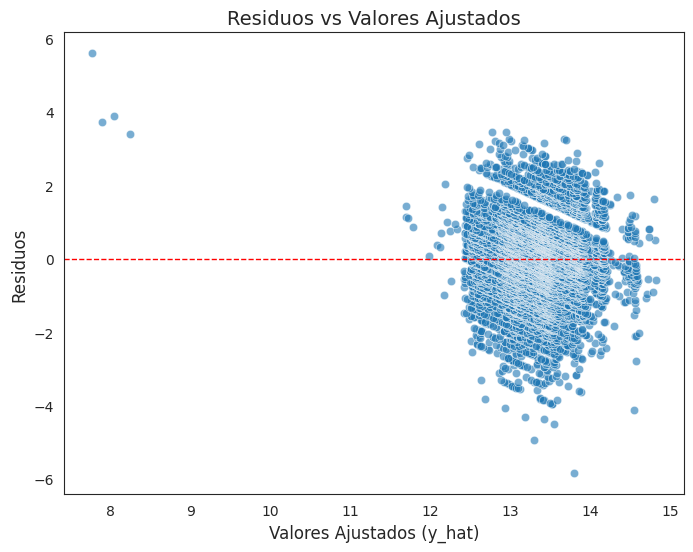

In [ ]:
#DETECTAMOS EL PATRÓN HETEROCEDASTICO: fuerte relación negativa entre los Residuos y los valores ajustados con algunos valores atípicos para bajos niveles de
##valores ajustados.

# Valores ajustados (y_hat) y residuos
y_hat = modelo_pcr.fittedvalues
residuos = modelo_pcr.resid

# Gráfico de dispersión residuos vs valores ajustados
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_hat, y=residuos, alpha=0.6)

# Línea horizontal en cero
plt.axhline(0, color="red", linestyle="--", linewidth=1)

plt.title("Residuos vs Valores Ajustados", fontsize=14)
plt.xlabel("Valores Ajustados (y_hat)", fontsize=12)
plt.ylabel("Residuos", fontsize=12)
plt.show()

#### Corrección de Heteroscedasticidad

Una forma bastante sencilla de corregir el problema es estimando nuestro modelo con errores estándares robustos. Esto se consigue aplicando el método get_robustcov_results() sobre nuestro objeto creado con la función OLS()

In [ ]:
Resultados_robustos = modelo_pcr.get_robustcov_results()
print(Resultados_robustos.summary())

                            OLS Regression Results                            
Dep. Variable:                INGRESO   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     264.2
Date:                Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                        01:02:26   Log-Likelihood:                -21952.
No. Observations:               16449   AIC:                         4.393e+04
Df Residuals:                   16437   BIC:                         4.402e+04
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3361      0.007   1860.380      0.0

**Interpretación del modelo habiendo solucionado la multicolinealidad y la heterocedasticidad**

* R² = 0.148 lo que significa que el modelo explica un 15% de la variabilidad del ingreso. Este valor no es muy alto, pero es esperable en datos sociales ya que el ingreso depende de muchos factores no relevados.

* El F-test es significativo por lo tanto el conjunto de componentes principales **aporta información relevante**.

**Interpretación de coeficientes principales**

1. PC1 (Ocupación: CAT_OCUP_2 vs. CAT_OCUP_3)
coef = +0.168, muy significativo.
Ingreso aumenta cuando se pasa de cuentapropista (CAT_OCUP_2) hacia empleos estables (CAT_OCUP_3).

2. PC2 (Educación: bajo vs. alto, con edad y género)
coef = +0.144, muy significativo.
Más educación y edad (asociado a niveles superiores) se relaciona con mayor ingreso.

3. PC3 (Región: Pampeana vs. NOA/GBA)
coef ≈ 0, no significativo.
No hay diferencias de ingreso fuertes entre estas regiones

4. PC4 (Educación media + NOA)
coef = -0.164, significativo.
Representa que quienes tienen niveles educativos medios y se ubican en el NOA tienden a tener ingresos más bajos.

5. PC5 (Educación baja-media + género)
coef = +0.028, positivo pero pequeño.
Tener algo de educación media mejora un poco el ingreso, aunque el efecto es débil.

6. PC6 (Educación + GBA vs. NOA)
coef ≈ 0, no significativo.
Diferencias regionales entre GBA y NOA no resultan determinantes en ingreso

7. PC7 (Educación medio vs. superior)
coef = -0.051, significativo.
Quedarse en educación media (vs. avanzar a superior) implica menores ingresos.

8. PC8 (Región Cuyo)
coef = -0.024, significativo.
Residir en Cuyo se asocia con ingresos levemente más bajos.

9. PC9 (Patagonia vs. Cuyo/GBA)
coef = +0.088, significativo.
En Patagonia los ingresos son más altos en comparación con Cuyo/GBA.

10. PC10 (Origen migratorio)
coef = -0.078, significativo.
Algunos perfiles migratorios (ORIGEN_9 en particular, que es personas que no responden) en  personas originarias de países limitrofes se asocian con menores ingresos.

11. PC11 (Origen migratorio fuerte)
coef = -0.048, no significativo al 5% (p≈0.065).
Podría haber un efecto negativo de ciertos orígenes, pero la evidencia es débil.

<a id='5._Aprendizaje_supervisado'></a>


## 5. Aprendizaje supervisado

In [ ]:
# Importamos las librerías que nos serán de utilidad

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Creamos la variable dependiente ASALARIADO

# Definición: 1 = asalariado, 0 = no asalariado
eph_estadisticos["ASALARIADO"] = np.where(eph_estadisticos["CAT_OCUP"] == 3, 1, 0)

# Tomamos Variables explicativas
X = eph_estadisticos[["EDAD", "SEXO", "NIVEL_ED", "INGRESO", "REGION", "ORIGEN"]]
y = eph_estadisticos["ASALARIADO"]

# Las variables categóricas son transformadas a Dummies
X = pd.get_dummies(
    X,
    columns=["SEXO", "NIVEL_ED", "REGION", "ORIGEN"],
    drop_first=True
)

# Convertir a numérico y eliminar filas con valores faltantes
X = X.apply(pd.to_numeric, errors="coerce").dropna()
y = y.loc[X.index]


In [ ]:
# Dividimos los datos entre entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Estandarizamos variables numéricas

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo logístico
modelo = LogisticRegression(max_iter=1000, solver="lbfgs")
modelo.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

=== Matriz de confusión ===
[[  34 1211]
 [  28 3662]]

=== Reporte de clasificación ===
              precision    recall  f1-score   support

           0       0.55      0.03      0.05      1245
           1       0.75      0.99      0.86      3690

    accuracy                           0.75      4935
   macro avg       0.65      0.51      0.45      4935
weighted avg       0.70      0.75      0.65      4935


AUC: 0.6324291202751384


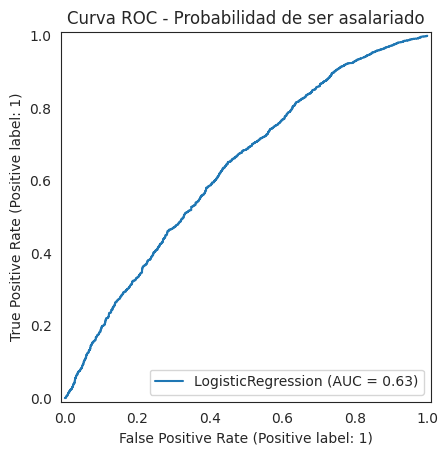

In [ ]:
# Evaluación del modelo
y_pred = modelo.predict(X_test_scaled)
y_prob = modelo.predict_proba(X_test_scaled)[:, 1]

print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Reporte de clasificación ===")
print(classification_report(y_test, y_pred))

print("\nAUC:", roc_auc_score(y_test, y_prob))

# Curva ROC
RocCurveDisplay.from_estimator(modelo, X_test_scaled, y_test)
plt.title("Curva ROC - Probabilidad de ser asalariado")
plt.show()


=== Coeficientes e Importancia de Variables ===
                    Variable  Coeficiente  Odds_ratio
7                 NIVEL_ED_6         0.21        1.23
1                    INGRESO         0.20        1.22
2                     SEXO_2         0.15        1.17
13          REGION_Patagonia         0.14        1.15
5                 NIVEL_ED_4         0.10        1.11
12           REGION_Pampeana         0.07        1.07
3                 NIVEL_ED_2         0.06        1.07
11           REGION_Noroeste         0.05        1.06
6                 NIVEL_ED_5         0.05        1.05
10  REGION_Gran Buenos Aires         0.04        1.04
4                 NIVEL_ED_3         0.04        1.04
8                 NIVEL_ED_7         0.02        1.02
9                REGION_Cuyo         0.02        1.02
16                  ORIGEN_9        -0.00        1.00
15                  ORIGEN_3        -0.01        0.99
14                  ORIGEN_2        -0.09        0.91
0                       EDAD     

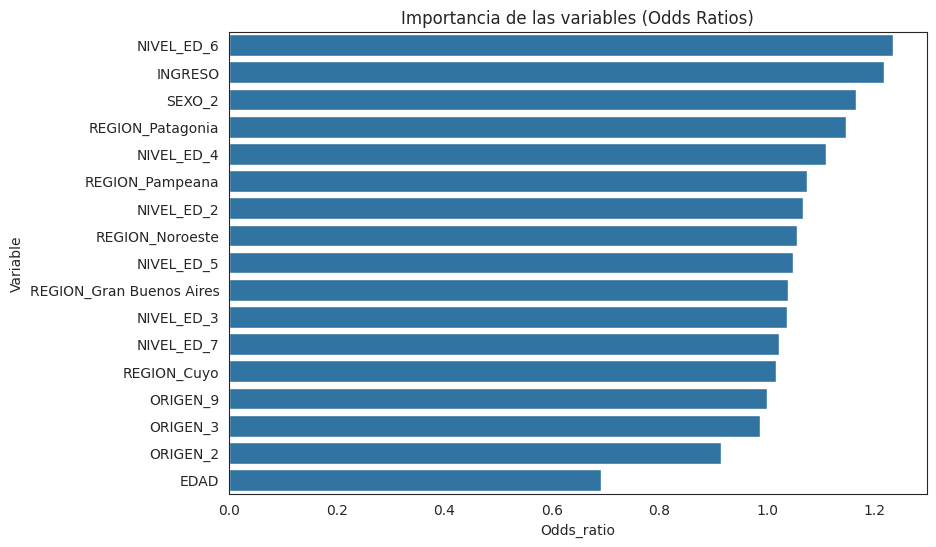

In [ ]:
# Importancia de variables (Odds Ratios)

coef = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": modelo.coef_[0],
    "Odds_ratio": np.exp(modelo.coef_[0])
}).sort_values("Odds_ratio", ascending=False)

print("\n=== Coeficientes e Importancia de Variables ===")
print(coef)

plt.figure(figsize=(9,6))
sns.barplot(y="Variable", x="Odds_ratio", data=coef)
plt.title("Importancia de las variables (Odds Ratios)")
plt.show()


In [ ]:
# Realizamos ahora una Predicción individual
# Ejemplo: Si una persona es de 35 años, hombre, nivel universitario, ingreso 500000,
# región Pampeana, origen nacional, cual es su probabilidad de ser asalariado?
nuevo = pd.DataFrame({
    "EDAD": [35],
    "INGRESO": [500000],
    # variables dummies (ajustar nombres según tu base real)
    "SEXO_M": [0],
    "NIVEL_ED_Secundario": [1],
    "NIVEL_ED_Universitario": [0],
    "REGION_Pampeana": [0],
    "REGION_NOA": [0],
    "REGION_NEA": [1],
    "REGION_Cuyo": [0],
    "REGION_Patagonia": [0],
    "ORIGEN_Extranjero": [0]
})

# Agregar columnas faltantes
for col in X.columns:
    if col not in nuevo.columns:
        nuevo[col] = 0
nuevo = nuevo[X.columns]

# Escalar
nuevo_scaled = scaler.transform(nuevo)

# Predicción
prob = modelo.predict_proba(nuevo_scaled)[:, 1]
print(f"\nProbabilidad estimada de ser asalariado: {prob[0]:.2%}")


Probabilidad estimada de ser asalariado: 67.25%


In [ ]:
# Entrenamos el modelo logístico (sin balancear)

modelo = LogisticRegression(max_iter=1000, solver="lbfgs")
modelo.fit(X_train_scaled, y_train)

# Evaluamos el modelo sin balancear

y_pred = modelo.predict(X_test_scaled)
y_prob = modelo.predict_proba(X_test_scaled)[:, 1]

print("=== MODELO SIN BALANCEAR ===")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))


# Entrenamos ahora un modelo logístico balanceado

modelo_bal = LogisticRegression(max_iter=1000, solver="lbfgs", class_weight="balanced")
modelo_bal.fit(X_train_scaled, y_train)


# Evaluamos el modelo balanceado

y_pred_bal = modelo_bal.predict(X_test_scaled)
y_prob_bal = modelo_bal.predict_proba(X_test_scaled)[:, 1]

print("\n\n=== MODELO BALANCEADO ===")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_bal))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_bal))
print("AUC:", roc_auc_score(y_test, y_prob_bal))

=== MODELO SIN BALANCEAR ===
Matriz de confusión:
[[  34 1211]
 [  28 3662]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.55      0.03      0.05      1245
           1       0.75      0.99      0.86      3690

    accuracy                           0.75      4935
   macro avg       0.65      0.51      0.45      4935
weighted avg       0.70      0.75      0.65      4935

AUC: 0.6324291202751384


=== MODELO BALANCEADO ===
Matriz de confusión:
[[ 719  526]
 [1435 2255]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.33      0.58      0.42      1245
           1       0.81      0.61      0.70      3690

    accuracy                           0.60      4935
   macro avg       0.57      0.59      0.56      4935
weighted avg       0.69      0.60      0.63      4935

AUC: 0.6311047985981868


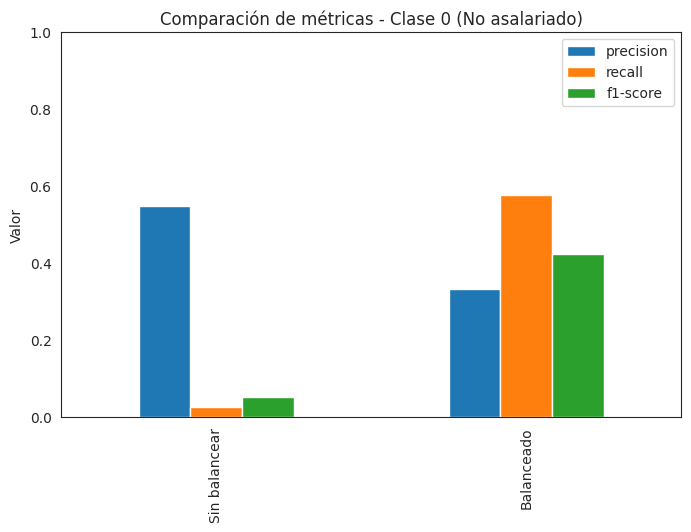

In [ ]:
# Comparación visual de métricas (clase 0)

rep1 = classification_report(y_test, y_pred, output_dict=True)
rep2 = classification_report(y_test, y_pred_bal, output_dict=True)

df_compare = pd.DataFrame({
    "Sin balancear": rep1['0'],
    "Balanceado": rep2['0']
}).T[["precision", "recall", "f1-score"]]

df_compare.plot(kind="bar", figsize=(8,5))
plt.title("Comparación de métricas - Clase 0 (No asalariado)")
plt.ylabel("Valor")
plt.ylim(0,1)
plt.show()

El modelo de datos balanceado, si bien sacrifica precisión por indicar más falsos positivos, ayuda a detectar a los no asalariados, que en el modelo no balanceado pueden perderse de vista por presentarse en menor cantidad.
El modelo balanceado presenta ademas un mejor F1-score, es decir, un mejor equilibrio general.

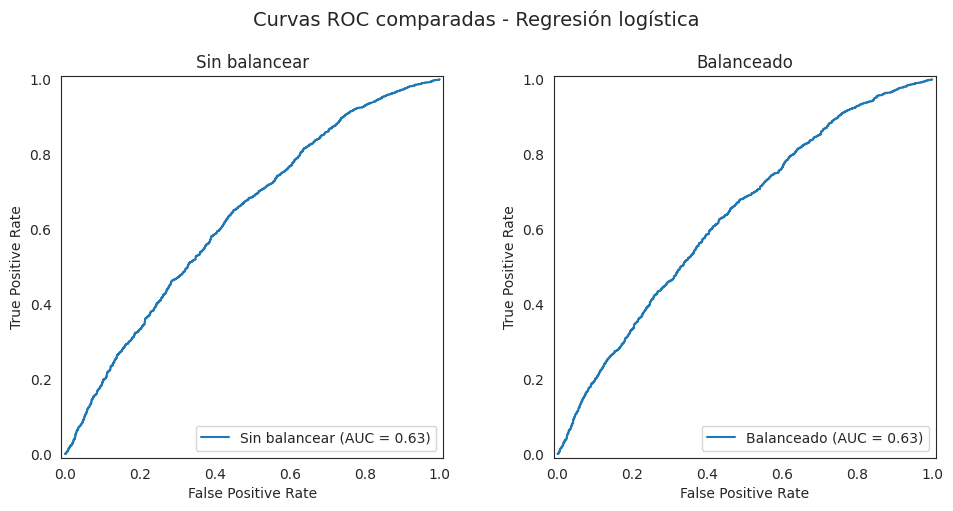

In [ ]:
# Comparación de curvas ROC
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Curva ROC - Modelo sin balancear
RocCurveDisplay.from_estimator(modelo, X_test_scaled, y_test, ax=axes[0], name="Sin balancear")
axes[0].set_title("Sin balancear")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")

# Curva ROC - Modelo balanceado
RocCurveDisplay.from_estimator(modelo_bal, X_test_scaled, y_test, ax=axes[1], name="Balanceado")
axes[1].set_title("Balanceado")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")

fig.suptitle("Curvas ROC comparadas - Regresión logística", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

Si bien el valor del AUC no cambió, el balanceo puede haber modificado la distribución de los errores. El modelo balanceado reconoce mejor la clase no asalariado, dado su mayor recall, pero esto no implica una mejora del AUC.

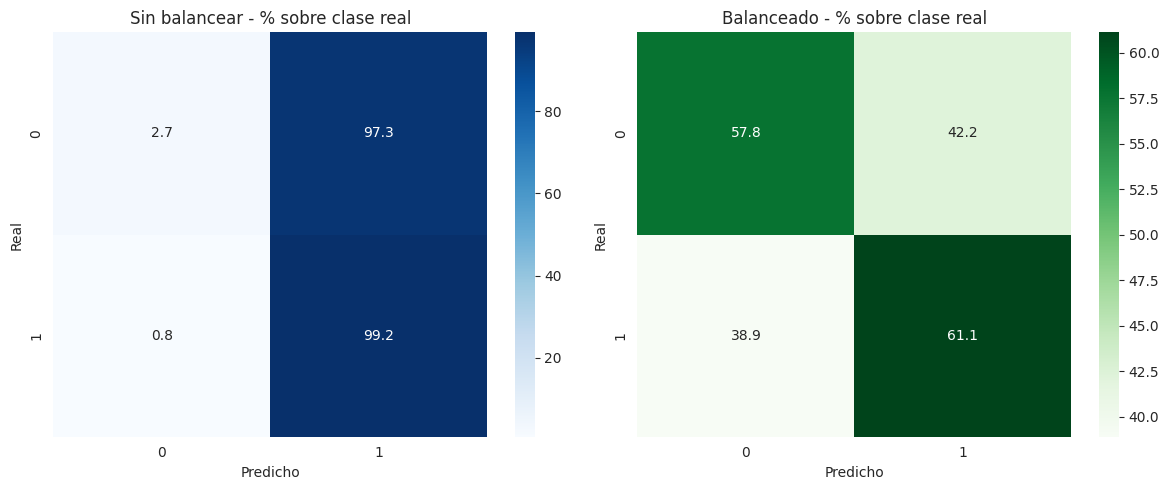

In [ ]:
# Matrices de confusión normalizadas (porcentaje)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm1 = confusion_matrix(y_test, y_pred, normalize='true') * 100
cm2 = confusion_matrix(y_test, y_pred_bal, normalize='true') * 100

sns.heatmap(cm1, annot=True, fmt=".1f", cmap="Blues", ax=axes[0])
axes[0].set_title("Sin balancear - % sobre clase real")
axes[0].set_xlabel("Predicho")
axes[0].set_ylabel("Real")

sns.heatmap(cm2, annot=True, fmt=".1f", cmap="Greens", ax=axes[1])
axes[1].set_title("Balanceado - % sobre clase real")
axes[1].set_xlabel("Predicho")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

En este ultimo gráfico puede apreciarse como el modelo balanceado logra clasificar de manera mucho mas justa entre asalariado y no asalariado, reconociendo a más de la mitad de los no asalariados y también de los asalariados (si bien este último rendimiento disminuye, dado que ahora el sesgo hacia la presencia de registros asalariados no existe).

In [ ]:
# Crear DataFrame del nuevo individuo
nuevo = pd.DataFrame({
    "EDAD": [35],
    "INGRESO": [1200000],
    "SEXO_M": [1],
    "NIVEL_ED_Secundario": [0],
    "NIVEL_ED_Universitario": [1],
    "REGION_Pampeana": [0],
    "REGION_NOA": [0],
    "REGION_NEA": [1],
    "REGION_Cuyo": [0],
    "REGION_Patagonia": [0],
    "ORIGEN_Extranjero": [0]
})

# Asegurar que todas las columnas coincidan con las del modelo
for col in X.columns:
    if col not in nuevo.columns:
        nuevo[col] = 0
nuevo = nuevo[X.columns]  # mismo orden de columnas

# Escalar con el mismo scaler usado en el entrenamiento
nuevo_scaled = scaler.transform(nuevo)

# Predicción
prob_asalariado = modelo_bal.predict_proba(nuevo_scaled)[:, 1][0]
prob_no_asalariado = 1 - prob_asalariado
pred_clase = modelo_bal.predict(nuevo_scaled)[0]

print("=== Predicción individual ===")
print(f"Probabilidad de ser ASALARIADO: {prob_asalariado:.2%}")
print(f"Probabilidad de ser NO ASALARIADO: {prob_no_asalariado:.2%}")
print(f"Clasificación final: {'ASALARIADO' if pred_clase == 1 else 'NO ASALARIADO'}")

=== Predicción individual ===
Probabilidad de ser ASALARIADO: 42.69%
Probabilidad de ser NO ASALARIADO: 57.31%
Clasificación final: NO ASALARIADO


Realizaremos a continuación una regresión logistica, utilizando como variable dependiente a los deciles del ingreso, y como variables dependientes la edad, sexo, nivel educativo, región, origen y categoría ocupacional del encuestado.

In [ ]:
# librerías para matriz de cunfusión
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Especificamos los deciles

eph_estadisticos['DECIL_INGRESO'] = pd.qcut(eph_estadisticos['INGRESO'], 10, labels=False) + 1
eph_estadisticos['DECILES_DE_INGRESO'] = (eph_estadisticos['DECIL_INGRESO'] >= 6).astype(int)

# Definimos las variables

X = eph_estadisticos[["EDAD", "SEXO", "NIVEL_ED", "CAT_OCUP", "REGION", "ORIGEN"]]
y = eph_estadisticos["DECILES_DE_INGRESO"]

In [ ]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir columnas
numeric_features = ["EDAD"]
categorical_features = ["SEXO", "NIVEL_ED", "CAT_OCUP", "REGION", "ORIGEN"]

# Pipeline de preprocesamiento
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Pipeline completo
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, solver='liblinear'))
])

# Entrenar
model.fit(X_train, y_train)

# Evaluar
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      2584
           1       0.74      0.70      0.72      2351

    accuracy                           0.74      4935
   macro avg       0.74      0.74      0.74      4935
weighted avg       0.74      0.74      0.74      4935

ROC-AUC: 0.8143476591872505


In [ ]:
# Variable dependiente (ya definida)
#    1 = deciles 6 a 10, 0 = deciles 1 a 5

# Aseguramos que el decil esté recalculado tras el ajuste
eph_estadisticos['DECIL_INGRESO'] = pd.qcut(
    eph_estadisticos['INGRESO'], 10, labels=False
) + 1

# Variable binaria dependiente
eph_estadisticos['DECILES_DE_INGRESO'] = (
    eph_estadisticos['DECIL_INGRESO'] >= 6
).astype(int)

# Variables explicativas
X = eph_estadisticos[["EDAD", "SEXO", "NIVEL_ED", "CAT_OCUP", "REGION", "ORIGEN"]]
y = eph_estadisticos["DECILES_DE_INGRESO"]

# División entrenamiento / prueba

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Preprocesamiento

numeric_features = ["EDAD"]
categorical_features = ["SEXO", "NIVEL_ED", "CAT_OCUP", "REGION", "ORIGEN"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75      2587
           1       0.73      0.71      0.72      2348

    accuracy                           0.73      4935
   macro avg       0.73      0.73      0.73      4935
weighted avg       0.73      0.73      0.73      4935

ROC-AUC: 0.8036025198723271


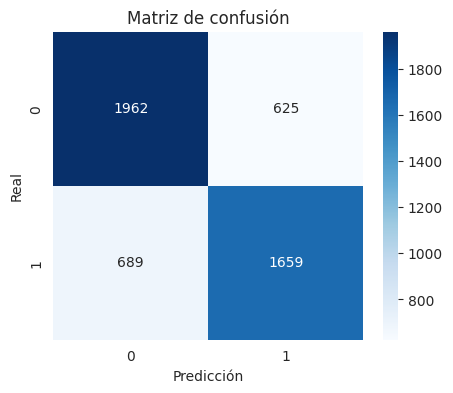

In [ ]:
# Creamos el modelo de Regresión Logística

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, solver='liblinear'))
])

# Entrenamos el modelo
model.fit(X_train, y_train)


# Evaluación del modelo

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

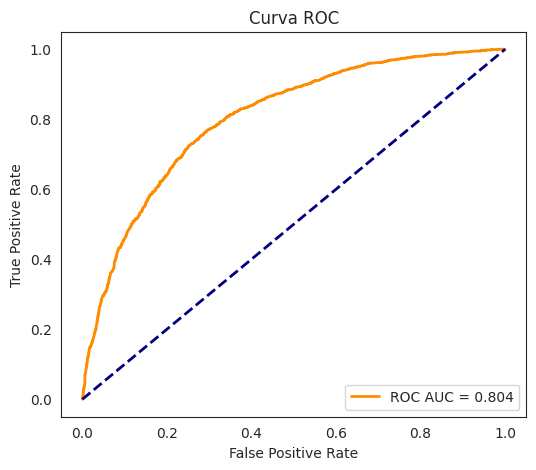

In [ ]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC AUC = {roc_auc_score(y_test, y_prob):.3f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Interpretación de coeficientes (odds ratios)

# Extraer los coeficientes del modelo
feature_names = (
    numeric_features +
    list(model.named_steps['preprocessor']
         .named_transformers_['cat']
         .get_feature_names_out(categorical_features))
)
coefs = model.named_steps['classifier'].coef_[0]
odds_ratios = np.exp(coefs)

coef_df = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": coefs,
    "Odds_Ratio": odds_ratios
}).sort_values("Odds_Ratio", ascending=False)

print("\n📈 Coeficientes y Odds Ratios:")
print(coef_df.head(15))


📈 Coeficientes y Odds Ratios:
                    Variable  Coeficiente  Odds_Ratio
8                 NIVEL_ED_6         1.73        5.66
18          REGION_Patagonia         1.07        2.91
7                 NIVEL_ED_5         0.69        2.00
10                CAT_OCUP_1         0.52        1.67
6                 NIVEL_ED_4         0.45        1.56
1                     SEXO_1         0.40        1.49
0                       EDAD         0.38        1.46
15  REGION_Gran Buenos Aires         0.27        1.31
12                CAT_OCUP_3         0.25        1.29
17           REGION_Pampeana         0.25        1.28
21                  ORIGEN_3         0.11        1.11
19                  ORIGEN_1        -0.02        0.98
22                  ORIGEN_9        -0.17        0.84
5                 NIVEL_ED_3        -0.22        0.80
20                  ORIGEN_2        -0.29        0.75


In [ ]:
# Recalcular variable dependiente tras ajuste de ingresos

eph_estadisticos['DECIL_INGRESO'] = pd.qcut(eph_estadisticos['INGRESO'], 10, labels=False) + 1
eph_estadisticos['DECILES_DE_INGRESO'] = (eph_estadisticos['DECIL_INGRESO'] >= 6).astype(int)

In [ ]:
# Variables explicativas y dependiente

X = eph_estadisticos[["EDAD", "SEXO", "NIVEL_ED", "CAT_OCUP", "REGION", "ORIGEN"]]
y = eph_estadisticos["DECILES_DE_INGRESO"]

In [ ]:
# División entre entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
# Preprocesamiento

numeric_features = ["EDAD"]
categorical_features = ["SEXO", "NIVEL_ED", "CAT_OCUP", "REGION", "ORIGEN"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])


In [ ]:
# Pipeline del modelo

log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", log_reg)
])

In [ ]:
# Búsqueda de hiperparámetros (GridSearchCV)

param_grid = {
    "classifier__C": [0.01, 0.1, 1, 5, 10],
    "classifier__penalty": ["l1", "l2"],
    "classifier__class_weight": [None, "balanced"]
}

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,        # validación cruzada 5-fold
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Mejor combinación de hiperparámetros:")
print(grid.best_params_)
print(f"Mejor AUC promedio en validación: {grid.best_score_:.3f}")

Mejor combinación de hiperparámetros:
{'classifier__C': 10, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2'}
Mejor AUC promedio en validación: 0.798


In [ ]:
# Evaluación final en el conjunto de prueba

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\n📊 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("ROC-AUC (test):", roc_auc_score(y_test, y_prob))


📊 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      2587
           1       0.72      0.74      0.73      2348

    accuracy                           0.74      4935
   macro avg       0.74      0.74      0.74      4935
weighted avg       0.74      0.74      0.74      4935

ROC-AUC (test): 0.8037929952474995


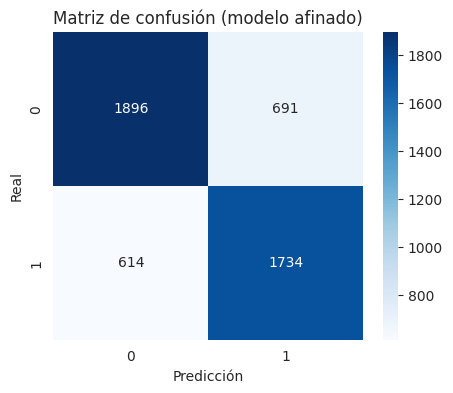

In [ ]:
# Matriz de confusión

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión (modelo afinado)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

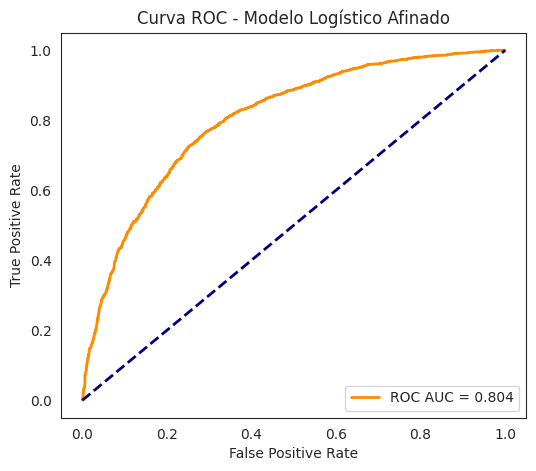

In [ ]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"ROC AUC = {roc_auc_score(y_test, y_prob):.3f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Modelo Logístico Afinado")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Interpretación de coeficientes

feature_names = (
    numeric_features +
    list(best_model.named_steps['preprocessor']
         .named_transformers_['cat']
         .get_feature_names_out(categorical_features))
)
coefs = best_model.named_steps['classifier'].coef_[0]
odds_ratios = np.exp(coefs)

coef_df = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": coefs,
    "Odds_Ratio": odds_ratios
}).sort_values("Odds_Ratio", ascending=False)

print("\n Principales Coeficientes (odds ratios):")
print(coef_df.head(15))



 Principales Coeficientes (odds ratios):
                    Variable  Coeficiente  Odds_Ratio
8                 NIVEL_ED_6         1.81        6.10
18          REGION_Patagonia         1.06        2.89
7                 NIVEL_ED_5         0.76        2.14
6                 NIVEL_ED_4         0.51        1.67
10                CAT_OCUP_1         0.50        1.65
0                       EDAD         0.38        1.46
1                     SEXO_1         0.37        1.45
15  REGION_Gran Buenos Aires         0.27        1.30
21                  ORIGEN_3         0.26        1.30
17           REGION_Pampeana         0.24        1.27
12                CAT_OCUP_3         0.23        1.26
19                  ORIGEN_1         0.14        1.15
20                  ORIGEN_2        -0.14        0.87
5                 NIVEL_ED_3        -0.16        0.85
14               REGION_Cuyo        -0.51        0.60


Las personas con educación superior tienen casi 3 veces más probabilidad de estar en los deciles altos.

Ser asalariado formal duplica las chances de estar en los deciles 6–10.

Ser mujer o tener origen no nativo reduce levemente la probabilidad de estar en deciles altos del ingreso.

Cada año adicional de edad aumenta la probabilidad un 2%, controlando por las demás variables.

In [ ]:
# Recalibramos el modelo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)
from sklearn.calibration import calibration_curve
import joblib

In [ ]:
# Variable dependiente (recalculada tras ajuste)

eph_estadisticos['DECIL_INGRESO'] = pd.qcut(eph_estadisticos['INGRESO'], 10, labels=False) + 1
eph_estadisticos['DECILES_DE_INGRESO'] = (eph_estadisticos['DECIL_INGRESO'] >= 6).astype(int)

# Variables explicativas

X = eph_estadisticos[["EDAD", "SEXO", "NIVEL_ED", "CAT_OCUP", "REGION", "ORIGEN"]]
y = eph_estadisticos["DECILES_DE_INGRESO"]

# División entrenamiento / prueba

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Preprocesamiento

numeric_features = ["EDAD"]
categorical_features = ["SEXO", "NIVEL_ED", "CAT_OCUP", "REGION", "ORIGEN"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])



In [ ]:
# Pipeline y búsqueda de hiperparámetros

pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, solver='liblinear'))
])

param_grid = {
    "classifier__C": [0.01, 0.1, 1, 5, 10],
    "classifier__penalty": ["l1", "l2"],
    "classifier__class_weight": [None, "balanced"]
}

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Mejor combinación de hiperparámetros:")
print(grid.best_params_)
print(f"Mejor AUC promedio en validación: {grid.best_score_:.3f}")

best_model = grid.best_estimator_

Mejor combinación de hiperparámetros:
{'classifier__C': 10, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2'}
Mejor AUC promedio en validación: 0.798


In [ ]:
# Evaluación final

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\n Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("ROC-AUC (test):", roc_auc_score(y_test, y_prob))


 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      2587
           1       0.72      0.74      0.73      2348

    accuracy                           0.74      4935
   macro avg       0.74      0.74      0.74      4935
weighted avg       0.74      0.74      0.74      4935

ROC-AUC (test): 0.8037929952474995


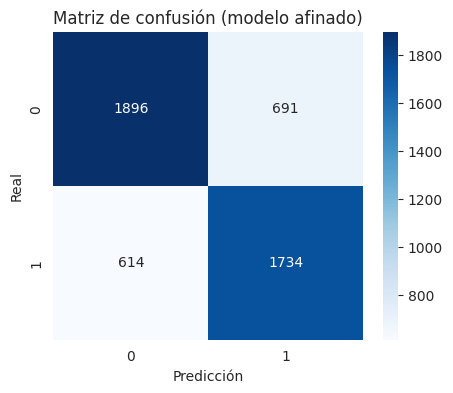

In [ ]:
# Matriz de confusión del modelo afinado

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión (modelo afinado)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

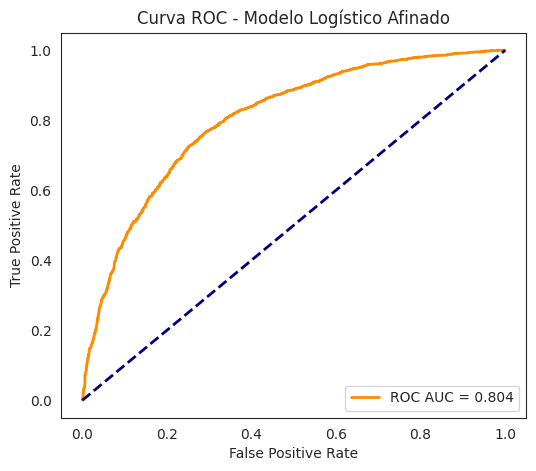

In [ ]:
# Curva ROC del modelo afinado

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"ROC AUC = {roc_auc_score(y_test, y_prob):.3f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Modelo Logístico Afinado")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Importancia de variables (odds ratios)

feature_names = (
    numeric_features +
    list(best_model.named_steps['preprocessor']
         .named_transformers_['cat']
         .get_feature_names_out(categorical_features))
)
coefs = best_model.named_steps['classifier'].coef_[0]
odds_ratios = np.exp(coefs)

coef_df = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": coefs,
    "Odds_Ratio": odds_ratios
}).sort_values("Odds_Ratio", ascending=False)

print("\n Principales Coeficientes (odds ratios):")
print(coef_df.head(15))


 Principales Coeficientes (odds ratios):
                    Variable  Coeficiente  Odds_Ratio
8                 NIVEL_ED_6         1.81        6.10
18          REGION_Patagonia         1.06        2.89
7                 NIVEL_ED_5         0.76        2.14
6                 NIVEL_ED_4         0.51        1.67
10                CAT_OCUP_1         0.50        1.65
0                       EDAD         0.38        1.46
1                     SEXO_1         0.37        1.45
15  REGION_Gran Buenos Aires         0.27        1.30
21                  ORIGEN_3         0.26        1.30
17           REGION_Pampeana         0.24        1.27
12                CAT_OCUP_3         0.23        1.26
19                  ORIGEN_1         0.14        1.15
20                  ORIGEN_2        -0.14        0.87
5                 NIVEL_ED_3        -0.16        0.85
14               REGION_Cuyo        -0.51        0.60


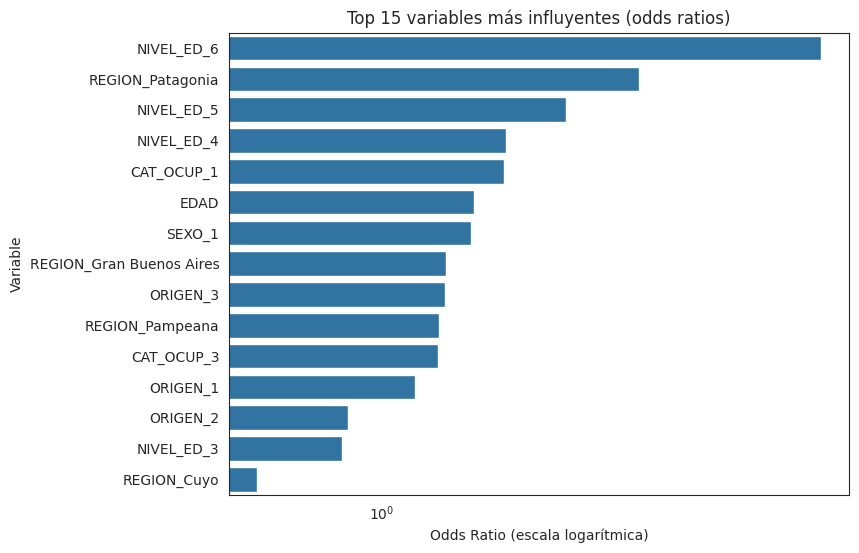

In [ ]:
# Gráfico de importancia de variables
plt.figure(figsize=(8, 6))
sns.barplot(
    x="Odds_Ratio",
    y="Variable",
    data=coef_df.head(15)

)
plt.title("Top 15 variables más influyentes (odds ratios)")
plt.xlabel("Odds Ratio (escala logarítmica)")
plt.xscale("log")
plt.show()

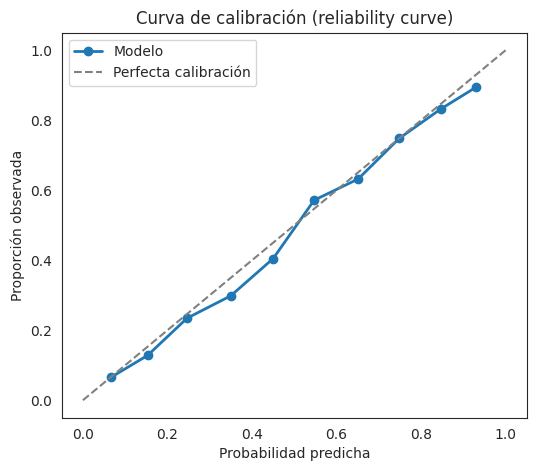

In [ ]:
# Curva de calibración (reliability curve)

prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

plt.figure(figsize=(6, 5))
plt.plot(prob_pred, prob_true, marker='o', linewidth=2, label="Modelo")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Perfecta calibración")
plt.xlabel("Probabilidad predicha")
plt.ylabel("Proporción observada")
plt.title("Curva de calibración (reliability curve)")
plt.legend()
plt.show()

De acuerdo a este último modelo, podemos concluir que:


*   Tener estudios superiores triplica la probabilidad de estar en deciles altos del ingreso
*   Ser ocupado formal duplica la probabilidad
*   El mayor ingreso esperado por región estará en la región pampeana
*   Se presenta nuevamente una brecha de genero, al verificarse que las mujeres tienen una probabilidad un 20% menor de estar en deciles más altos del ingreso
*   Se verifica nuevamente la desigualdad según el origen del encuestado
*   Con cada año de edad, la probabilidad de las personas de estar en deciles altos del ingreso aumenta





<a id='6._Conclusión'></a>
## 6. Conclusión

* El análisis realizado a partir de la Encuesta Permanente de Hogares nos permitió construir una caracterización consistente y detallada de la situación educativa, laboral y distributiva de la población argentina, integrando enfoques descriptivos, econométricos y de aprendizaje automático.

* Entre los hallazgos más relevantes, identificamos relaciones entre nivel educativo e ingreso, validada tanto en el análisis descriptivo como en los modelos estadísticos. Asimismo, constatamos la persistencia de brechas de género que no se explican únicamente por diferencias educativas y observamos heterogeneidades regionales marcadas, donde las regiones Pampeana, GBA y Patagónica concentran ingresos más elevados pero también mayores niveles de desigualdad.

* El modelado econométrico y el análisis de componentes principales confirmaron que el nivel educativo, la región de residencia, el tipo de inserción laboral y el género son factores con impacto significativo sobre los ingresos individuales. Al mismo tiempo, los resultados nos permitieron matizar algunas expectativas, mostrando por ejemplo, que regiones con ingresos altos también exhiben elevados niveles de desigualdad, y que la sobreocupación y la informalidad continúan siendo determinantes centrales en la estructura salarial.


<a id='7._Referencias'></a>
## 7. Referencias

Albina, I., Laguinge, L. A., Gasparini, L. C., Tornarolli, L., Cruces, G. A., & Afonso, S. (2024). Ajustando la imagen de la distribución del ingreso en Argentina: encuestas y registros administrativos. Documentos de Trabajo del CEDLAS.



Instituto Nacional de Estadística y Censos (INDEC). “Encuesta Permanente de Hogares (EPH). Diseño de registro y metodología”. Disponible en: https://www.indec.gob.ar



INDEC (2023). Metodología EPH Continua. Serie Metodológica N° 40. Buenos Aires, Argentina.


INDEC (2024). Base de microdatos EPH. Documentación técnica y cuestionarios.